# Mount

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
import os
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Helper functions

In [ ]:
def get_max_mean_metric_score_with_threshold(metrics_thresholds, metric):
    max_mean_jaccard = np.max([np.mean(mt[metric]) for mt in metrics_thresholds])
    threshold = np.argmax([np.mean(mt[metric]) for mt in metrics_thresholds])
    return max_mean_jaccard, threshold

In [ ]:
def get_max_2(clip_metrics_thresholds, metric='o_f1', short = False):
  if short:
    train_epochs_loop = [5 for _ in range(10)]
  else:
    train_epochs_loop = [5 for _ in range(16)]
  
  max_mean_vals = []
  threshold_vals = []
  x_vals = [np.sum(train_epochs_loop[:i+1]) for i in range(len(train_epochs_loop))]
  for idx_tr_ep in range(len(train_epochs_loop)):
    mt = []
    for idx_t in range(len(clip_metrics_thresholds)):
      mt.append(clip_metrics_thresholds[idx_t][idx_tr_ep])

    mmv, t = get_max_mean_metric_score_with_threshold(mt, metric)
    max_mean_vals.append(mmv)
    

  print("Max {} = {}".format(metric, np.max(max_mean_vals)))
  return np.max(max_mean_vals), 0.1

In [ ]:
def get_results_folders(path):
  folder_names = glob.glob(os.path.join(path, '*'))
  filtered_folders_names = list(filter(lambda x: x if "Embeddings" in x and "Object-Detection" not in x else None, folder_names))
  return filtered_folders_names

In [ ]:
def get_dataset_dict(ds_type="all"):
  single_label_datasets = {
      "omniglot": ["Omniglot", "Omniglot", "OM"],
      "lfw": ["LFW", "LFW", "LFW"],
      "imagenet-a": ["ImagenetA", "ImagenetA", "IA"],
      "imagenet-r": ["ImagenetR", "ImagenetR", "IR"],
      "miniimagenet": ["MiniImagenet", "MiniImagenet", "MI"],
      "ucf101": ["UCF101", "UCF101", "UCF"],
      "isr": ["IndoorSceneRecognition", "ISR", "ISR"],
      "cifar10": ["CIFAR10", "CIFAR10", "C10"],
      "imagenet-sketch": ["ImagenetSketch", "ImagenetSketch", "IS"]
  }

  multi_label_datasets = {
      "utk": ["UTKFaces", "UTKFaces", "UTK"],
      "coco_patch": ["Coco", "Coco", "COCO_P"],
      "coco_full": ["Coco", "Coco", "COCO_F"],
      "celeba": ["CelebAAttributes", "CelebAAttributes", "CAA"],
      "yale": ["YaleFaces", "YaleFaces", "YF"],
      "imaterialist_patch": ["FGCVIMaterialist", "IMaterialist", "IM_P"],
      "imaterialist_full": ["FGCVIMaterialist", "IMaterialist", "IM_F"],
  }

  few_shot_datasets = {
      "cifar10": ["CIFAR10", "CIFAR10", "C10"],
      "omniglot": ["Omniglot", "Omniglot", "OM"],
      "miniimagenet": ["MiniImagenet", "MiniImagenet", "MI"],
  }

  all_datasets = {**single_label_datasets, **multi_label_datasets}

  threshold_plot_datasets = {
      "omniglot": ["Omniglot", "Omniglot", "OM"],
      "lfw": ["LFW", "LFW", "LFW"],
      "imagenet-a": ["ImagenetA", "ImagenetA", "IA"],
      "imagenet-r": ["ImagenetR", "ImagenetR", "IR"],
      "miniimagenet": ["MiniImagenet", "MiniImagenet", "MI"],
      "ucf101": ["UCF101", "UCF101", "UCF"],
      "isr": ["IndoorSceneRecognition", "ISR", "ISR"],
      "cifar10": ["CIFAR10", "CIFAR10", "C10"],
      "imagenet-sketch": ["ImagenetSketch", "ImagenetSketch", "IS"],
      "utk": ["UTKFaces", "UTKFaces", "UTK"],
      "coco_full": ["Coco", "Coco", "COCO_F"],
      "celeba": ["CelebAAttributes", "CelebAAttributes", "CAA"],
      "yale": ["YaleFaces", "YaleFaces", "YF"],
      "imaterialist_patch": ["FGCVIMaterialist", "IMaterialist", "IM_P"],
  }

  if ds_type=="single":
    return single_label_datasets
  elif ds_type=="multi":
    return multi_label_datasets
  elif ds_type=="all":
    return all_datasets
  elif ds_type=="fewshot":
    return few_shot_datasets
  elif ds_type=="threshold_plot":
    return threshold_plot_datasets

def get_dataset_foldername(dataset):
  dic = get_dataset_dict()
  return dic[dataset][0]

def get_dataset_filename(dataset):
  dic = get_dataset_dict()
  return dic[dataset][1]

In [ ]:
def get_results_data_path(dataset_name, results_folders):
  for folder_path in results_folders:
    if dataset_name in folder_path:
      return folder_path
  raise Exception("Invalid dataset name... Folder not found in drive")

In [ ]:
def read_json(filepath):
  with open(filepath, 'r') as f:
    data = json.load(f)
    return data

In [ ]:
def get_results_filename(dataset_filename, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, clip_sota_eval, train, full_patch=None, load_graphs = True):

  
  if load_graphs:
    file_suffix = "metrics_graphs" 
  else:
    file_suffix = "metrics_with_logits"
  
  file_prefix = "new_metrics"
  file_type = ".json"

  filename = file_prefix + dataset_filename

  if full_patch:
    if full_patch == "full":
      filename = filename + "_Full_Full"
    elif full_patch == "patch":
      filename = filename + "_Patch_Patch"

  if softmax and train:
    filename = filename + '_' + "softmax"
  elif softmax:
    filename = filename + '_' + "softmax" + '_'

  if continual:
    filename = filename + '_'
  elif not softmax and not train:
    filename = filename + '_' + "0t"
  elif softmax and not train:
    filename = filename + "0t"
  elif train:
    filename = filename + '_'

  filename = filename + str(num_ways) + "w"
  filename = filename + str(num_shot) + "s"
  filename = filename + str(num_aug) + "a"

  if continual:
    filename = filename + "_continual"

  if trivial_aug:
    filename = filename + "_trivial"
  
  if clip_sota_eval == "linear-probe":
    filename = filename + "_clip_lp"
  elif clip_sota_eval == "zero-shot":
    filename = filename + "_clip_zs"

  filename = filename + "_" + file_suffix + file_type

  return filename

In [ ]:
def get_single_label_data_from_csv(num_ways, num_shot, metric, src_path=None):
  if metric == "accuracy":
    metric_string = "Accuracy"
  if metric == 'f1_score':
    metric_string = "F1"

  filename = "1_SingleLabel_" + str(num_ways) + "w" + str(num_shot) + "s_" + metric_string + ".csv"
  filepath = os.path.join(src_path, "CLIPPER_paper_files", filename)

  df = pd.read_csv(filepath, index_col=0)

  return df

In [ ]:
def get_data_from_single_file(dataset, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, train, clip_sota_eval=None, src_path=None, full_patch=None, load_graphs = True):
  results_folders = get_results_folders(src_path)
  dataset_foldername = get_dataset_foldername(dataset)
  results_folder = get_results_data_path(dataset_foldername, results_folders)
  dataset_filename = get_dataset_filename(dataset)
  results_filename = get_results_filename(dataset_filename, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, clip_sota_eval, train, full_patch=full_patch, load_graphs = load_graphs)
  filepath = os.path.join(results_folder, results_filename)
  print(filepath)
  data = read_json(filepath)
  return data

In [ ]:
def get_max(data, softmax):
  if softmax:
    max_score = max(data[0])
    corr_threshold = None
  else:
    max_score = max(data[0])
    ind = np.argmax(data[0])
    corr_threshold = data[1][ind]
  return max_score, corr_threshold

## Table Templates



Table Template 1 Example
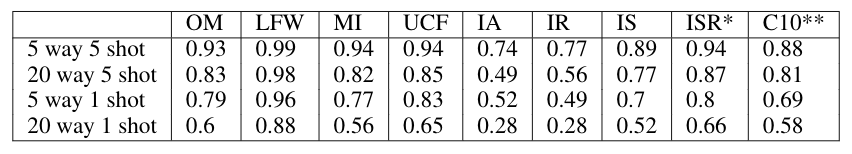

In [ ]:
def generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=None, num_digits=2, clip_sota_eval=None):
  c, r = len(datasets), len(num_ways_all)*len(num_shot);

  results = [[None for x in range(c)] for y in range(r)] 
  results_ind_labels = []

  # Get index labels
  for i, s in enumerate(num_shot):
    for j, w in enumerate(num_ways_all):
      index_label = str(w) + " way " + str(s) + " shot "
      results_ind_labels.append(index_label)

  # Iterate through all datasets
  for d, dataset in enumerate(datasets):

    if dataset == "isr" or dataset=="utk":
      num_ways = num_ways_isr_utk
    elif dataset == "cifar10":
      num_ways = num_ways_cifar
    else:
      num_ways = num_ways_all
    
    for a in num_aug:
      for i, s in enumerate(num_shot):
        for j, w in enumerate(num_ways):
          try:
            if "patch" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="patch", load_graphs = False)
              if s == 1 and w == 20:
                max_score, corr_threshold = get_max_2(data["metrics"], metric, short = True)
              else:
                max_score, corr_threshold = get_max_2(data["metrics"], metric, short = False)
            elif "full" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="full", load_graphs = False)
              if s == 1 and w == 20:
                max_score, corr_threshold = get_max_2(data["metrics"], metric, short = True)
              else:
                max_score, corr_threshold = get_max_2(data["metrics"], metric, short = False)
            else:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path)
              max_score, corr_threshold = get_max(data[metric], softmax)
              max_score = round(max_score, num_digits)
          except FileNotFoundError:
            max_score = None
            print("Unable to find data for: {}, {}, {}, {}, {}".format(dataset, w, s, "softmax" if softmax else "sigmoid", "train" if train else "No training"))
          
          ind = i * 2 + j 
          results[ind][d] = max_score

  formatted_results = np.array(results)
  formatted_results.shape
  df = pd.DataFrame(formatted_results, columns=dataset_ids, index=results_ind_labels)
  return df

Table Template 2 Example - score

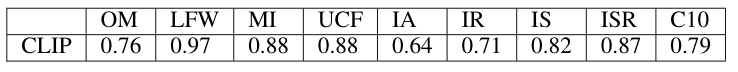

In [ ]:
def generate_table_template_2(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=None, num_digits=2, clip_sota_eval=None):
  c, r = len(datasets), 1;

  results = [[None for x in range(c)]] 
  results_ind_labels = ["CLIP"]

  # Iterate through all datasets
  for d, dataset in enumerate(datasets):

    if dataset == "isr" or dataset=="utk":
      num_ways = num_ways_isr_utk
    elif dataset == "cifar10":
      num_ways = num_ways_cifar
    else:
      num_ways = num_ways_all
    
    for a in num_aug:
      for i, s in enumerate(num_shot):
        for j, w in enumerate(num_ways):
          try:
            if "patch" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="patch", load_graphs = False)
              max_score, corr_threshold = get_max_2(data["metrics"], metric)
            elif "full" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="full", load_graphs = False)
              max_score, corr_threshold = get_max_2(data["metrics"], metric)
            else:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path)
              max_score, corr_threshold = get_max(data[metric], softmax)
              max_score = round(max_score, num_digits)
          except:
            max_score = None
            print("Unable to find data for: {}, {}, {}, {}, {}".format(dataset, w, s, "softmax" if softmax else "sigmoid", "train" if train else "No training"))
          
          results[0][d] = max_score
    

  formatted_results = np.array(results)
  formatted_results.shape
  df = pd.DataFrame(formatted_results, columns = dataset_ids, index=results_ind_labels)
  return df

Table Template 3 Example - Thresholds

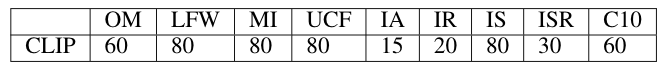

In [ ]:
def generate_table_template_3(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=None, num_digits=2, clip_sota_eval=None):
  c, r = len(datasets), 1;

  results = [[None for x in range(c)]] 
  results_ind_labels = ["CLIP"]

  # Iterate through all datasets
  for d, dataset in enumerate(datasets):

    if dataset == "isr" or dataset=="utk":
      num_ways = num_ways_isr_utk
    elif dataset == "cifar10":
      num_ways = num_ways_cifar
    else:
      num_ways = num_ways_all
    for a in num_aug:
      for i, s in enumerate(num_shot):
        for j, w in enumerate(num_ways):
          try:
            if "patch" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="patch")
            elif "full" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="full")
            else:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path)
            max_score, corr_threshold = get_max(data[metric], softmax)
          except:
            corr_threshold = None
            print("Unable to find data for: {}, {}, {}, {}, {}".format(dataset, w, s, "softmax" if softmax else "sigmoid", "train" if train else "No training"))
          
          results[0][d] = corr_threshold

  formatted_results = np.array(results)
  formatted_results.shape
  df = pd.DataFrame(formatted_results, columns = dataset_ids, index=results_ind_labels)
  return df

Table Template 4 Example

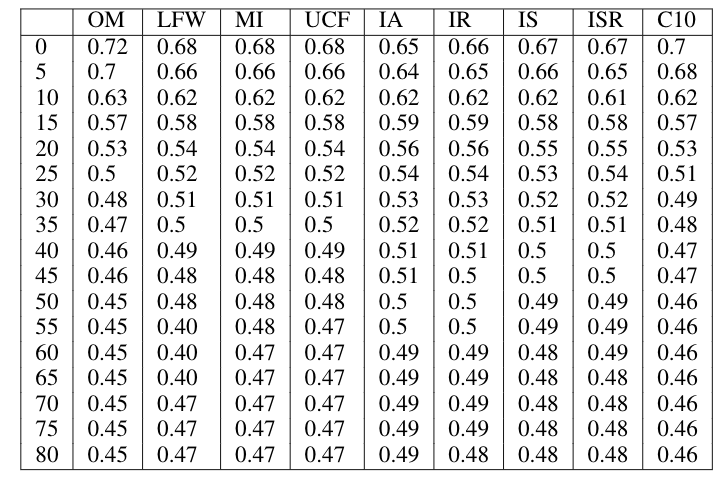

In [ ]:
def generate_table_template_4(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=None, num_digits=2, clip_sota_eval=None):
  
  try:
    data = get_data_from_single_file(datasets[0], num_ways_all[0], num_shot[0], num_aug[0], trivial_aug, softmax, continual, train, src_path=src_path)
    num_thresholds = len(data[metric][1])
  except:
    raise Exception("Sample dataset file not found...")  


  c, r = len(datasets), num_thresholds
  #print(num_thresholds)

  results = [[None for x in range(c)] for y in range(r)] 
  results_ind_labels = [x * 5 for x in range(num_thresholds)]

  # Iterate through all datasets
  for d, dataset in enumerate(datasets):

    if dataset == "isr" or dataset=="utk":
      num_ways = num_ways_isr_utk
    elif dataset == "cifar10":
      num_ways = num_ways_cifar
    else:
      num_ways = num_ways_all

    for a in num_aug:
      for i, s in enumerate(num_shot):
        for j, w in enumerate(num_ways):
          try:
            if "patch" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="patch")
            elif "full" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="full")
            else:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path)
            #max_score, corr_threshold = get_max(data[metric], softmax)
            threshold_values = data[metric][1]
          except:
            print("Unable to find data for: {}, {}, {}, {}, {}".format(dataset, w, s, "softmax" if softmax else "sigmoid", "train" if train else "No training"))
          
          #print(np.array(results).shape)
          #print(threshold_values)

          for k, t in enumerate(threshold_values):
            results[k][d] = t

  formatted_results = np.array(results)
  formatted_results.shape
  df = pd.DataFrame(formatted_results, columns = dataset_ids, index=results_ind_labels)
  return df

Table 5 Template Example

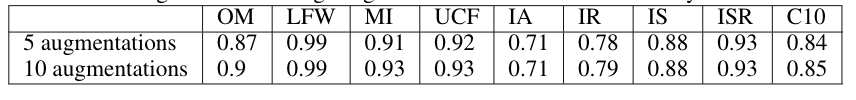

In [ ]:
def generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=None, num_digits=2, clip_sota_eval=None):
  c, r = len(datasets), len(num_aug);

  results = [[None for x in range(c)] for y in range(r)] 
  results_ind_labels = []

  # Get index labels
  for a in num_aug:
      index_label = str(a) + " augmentations"
      results_ind_labels.append(index_label)

  # Iterate through all datasets
  for d, dataset in enumerate(datasets):

    if dataset == "isr" or dataset=="utk":
      num_ways = num_ways_isr_utk
    elif dataset == "cifar10":
      num_ways = num_ways_cifar
    else:
      num_ways = num_ways_all
    
    for k, a in enumerate(num_aug):
      for i, s in enumerate(num_shot):
        for j, w in enumerate(num_ways):
          try:
            if "patch" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="patch", load_graphs = False)
              max_score, corr_threshold = get_max_2(data["metrics"], metric)
            elif "full" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="full", load_graphs = False)
              max_score, corr_threshold = get_max_2(data["metrics"], metric)
            else:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path)
              max_score, corr_threshold = get_max(data[metric], softmax)
              max_score = round(max_score, num_digits)
          except FileNotFoundError:
            max_score = None
            print(exc)
            print("Unable to find data for: {}, {}, {}, {}, {}".format(dataset, w, s, "softmax" if softmax else "sigmoid", "train" if train else "No training"))
          
          results[k][d] = max_score

  formatted_results = np.array(results)
  formatted_results.shape
  df = pd.DataFrame(formatted_results, columns = dataset_ids, index=results_ind_labels)
  return df

Table 6 Template Example

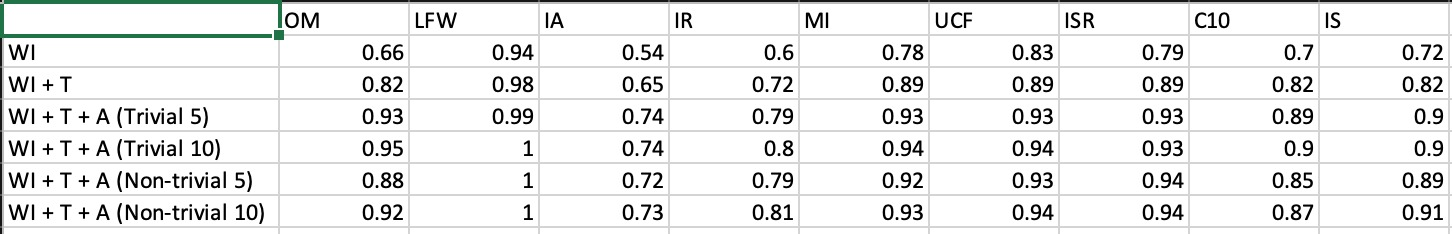

In [ ]:
def generate_table_template_6(df_nt_na, df_t_na, df_t_ta, df_t_nta, softmax):
  num_datasets = len(df_nt_na.columns)

  if num_datasets != len(df_t_na.columns) or  num_datasets != len(df_t_ta.columns) or num_datasets != len(df_t_nta.columns):
    raise Exception("Make sure all the dfs have the same num of datasets...")
  
  if softmax:
    labels = [
    "WI",
    "WI + T",
    "WI + T + A (Trivial 10)",
    "WI + T + A (Non-trivial 10)"       
  ]
  else:
    labels = [
    "WI",
    "WI + T",
    "WI + T + A (Trivial 5)",
    "WI + T + A (Trivial 10)",
    "WI + T + A (Non-trivial 5)",
    "WI + T + A (Non-trivial 10)"       
  ]

  df_nt = df_nt_na.filter(like='5 way 5 shot', axis=0)

  dfs = [df_nt, df_t_na, df_t_ta, df_t_nta]

  #for df in dfs:
  #  print(df)

  combined_df = pd.concat(dfs)
  combined_df.index = labels

  sorted_labels = [
    "WI",
    "WI + T",
    "WI + T + A (Non-trivial 5)",
    "WI + T + A (Trivial 5)",
    "WI + T + A (Non-trivial 10)",
    "WI + T + A (Trivial 10)"      
  ]

  combined_df = combined_df.reindex(sorted_labels)

  return combined_df


Table Template 7 Example - Specific to clip eval
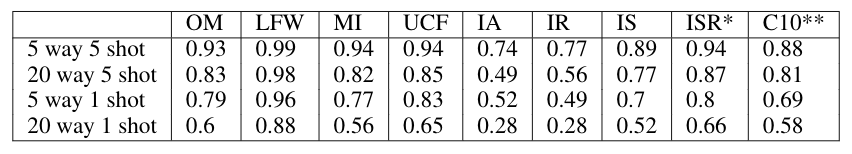

In [ ]:
def generate_table_template_7(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=None, num_digits=2, clip_sota_eval=None):
  c, r = len(datasets), len(num_ways_all)*len(num_shot);

  results = [[None for x in range(c)] for y in range(r)] 
  results_ind_labels = []

  # Get index labels
  for i, s in enumerate(num_shot):
    for j, w in enumerate(num_ways_all):
      index_label = str(w) + " way " + str(s) + " shot "
      results_ind_labels.append(index_label)

  # Iterate through all datasets
  for d, dataset in enumerate(datasets):

    if dataset == "isr" or dataset=="utk":
      num_ways = num_ways_isr_utk
    elif dataset == "cifar10":
      num_ways = num_ways_cifar
    else:
      num_ways = num_ways_all
    
    for a in num_aug:
      for i, s in enumerate(num_shot):
        for j, w in enumerate(num_ways):
          try:
            if "patch" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="patch")
            elif "full" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="full")
            else:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path)
            max_score = data[metric][0][0]
            max_score = round(max_score, num_digits)
          except:
            max_score = None
            print("Unable to find data for: {}, {}, {}, {}, {}".format(dataset, w, s, "softmax" if softmax else "sigmoid", "train" if train else "No training"))
          
          ind = i * 2 + j 
          results[ind][d] = max_score

  formatted_results = np.array(results)
  formatted_results.shape
  df = pd.DataFrame(formatted_results, columns = dataset_ids, index=results_ind_labels)
  return df

Table Template 8 Example

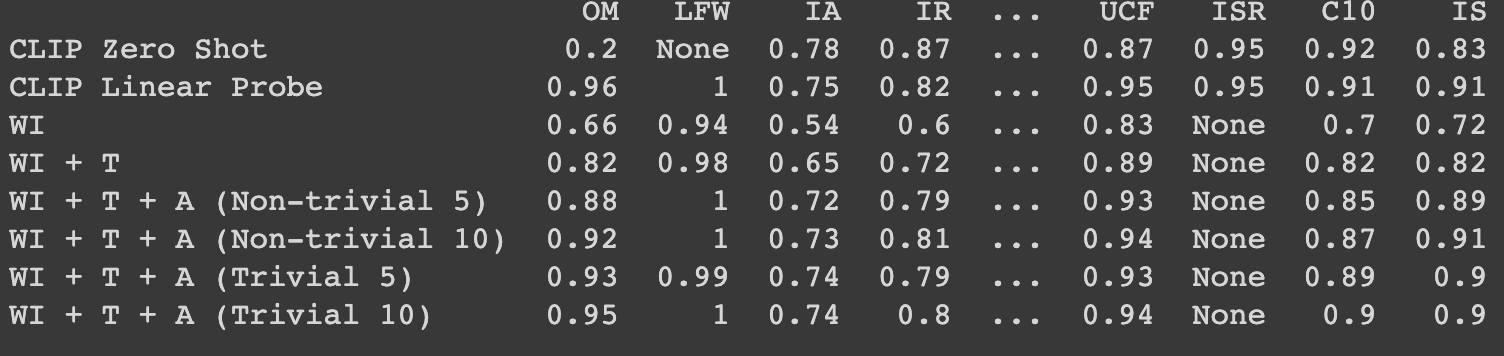


In [ ]:
def generate_table_template_8(df_clip_zs, df_clip_lp, df_nt_na, df_t_na, df_t_ta, df_t_nta, softmax):
  num_datasets = len(df_nt_na.columns)

  if num_datasets != len(df_t_na.columns) or  num_datasets != len(df_t_ta.columns) or num_datasets != len(df_t_nta.columns):
    raise Exception("Make sure all the dfs have the same num of datasets...")
  
  if softmax:
    labels = [
    "CLIP Zero Shot",
    "CLIP Linear Probe",
    "WI",
    "WI + T",
    "WI + T + A (Non-trivial 10)",
    "WI + T + A (Trivial 10)"     
  ]
  else:
    labels = [
    "CLIP Zero Shot",
    "CLIP Linear Probe",
    "WI",
    "WI + T",
    "WI + T + A (Non-trivial 5)",
    "WI + T + A (Non-trivial 10)", 
    "WI + T + A (Trivial 5)",
    "WI + T + A (Trivial 10)",      
  ]

  df_nt = df_nt_na.filter(like='5 way 5 shot', axis=0)
  df_zs = df_clip_zs.filter(like='5 way 5 shot', axis=0)
  df_lp = df_clip_lp.filter(like='5 way 5 shot', axis=0)

  dfs = [df_zs, df_lp, df_nt, df_t_na, df_t_nta, df_t_ta]

  #for df in dfs:
  #  print(df)

  combined_df = pd.concat(dfs)
  combined_df.index = labels
  return combined_df

Table Template 9 Example

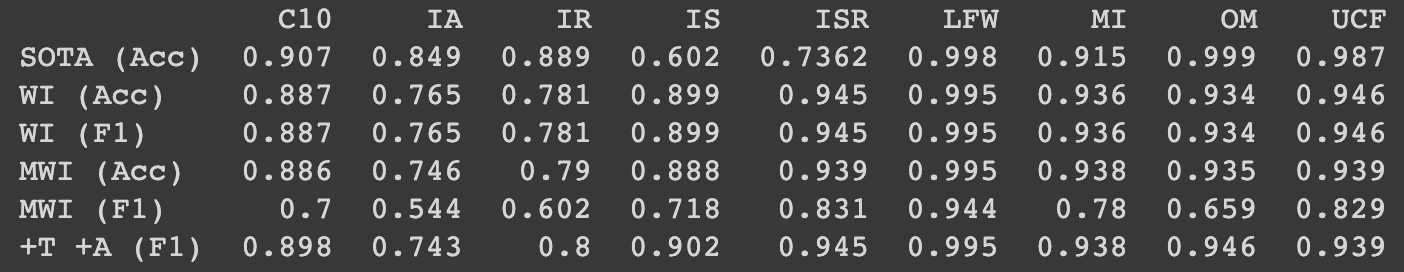

In [ ]:
# Single label
def generate_table_template_9(df_sota, df_sof_nt_na_acc, df_sof_nt_na_f1, df_sig_nt_na_acc, df_sig_nt_na_f1, df_sig_t_ta_f1, df_sig_t_ta_top1acc, df_sig_t_ta_cacc):
  labels = [
      "SOTA (Acc)",
      "WI (Acc)",
      "WI (F1)",
      "MWI (Acc)",
      "MWI (F1)",
      "+T +A (F1)",
      "+T +A (Top-1 Acc)",
      "+T +A (Class Acc)"   
    ]
    
  dfs = [df_sota, df_sof_nt_na_acc, df_sof_nt_na_f1, df_sig_nt_na_acc, df_sig_nt_na_f1, df_sig_t_ta_f1, df_sig_t_ta_top1acc, df_sig_t_ta_cacc]

  #for df in dfs:
  #  print(df)

  combined_df = pd.concat(dfs)
  combined_df.index = labels
  return combined_df

Table Template 10 Example

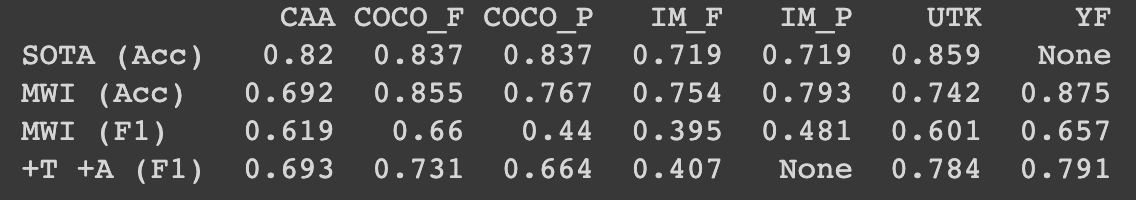

In [ ]:
# Multilabel
def generate_table_template_10(df_sota, df_sig_nt_na_acc, df_sig_nt_na_f1, df_sig_t_ta_f1, df_sig_t_ta_acc):
  labels = [
      "SOTA (Acc)",
      "MWI (Acc)",
      "MWI (F1)",
      "+T +A (F1)",
      "+T +A (Acc)"
    ]
  dfs = [df_sota, df_sig_nt_na_acc, df_sig_nt_na_f1, df_sig_t_ta_f1, df_sig_t_ta_acc]

  #for df in dfs:
  #  print(df)

  combined_df = pd.concat(dfs)
  combined_df.index = labels
  return combined_df

Table Template 11 Example

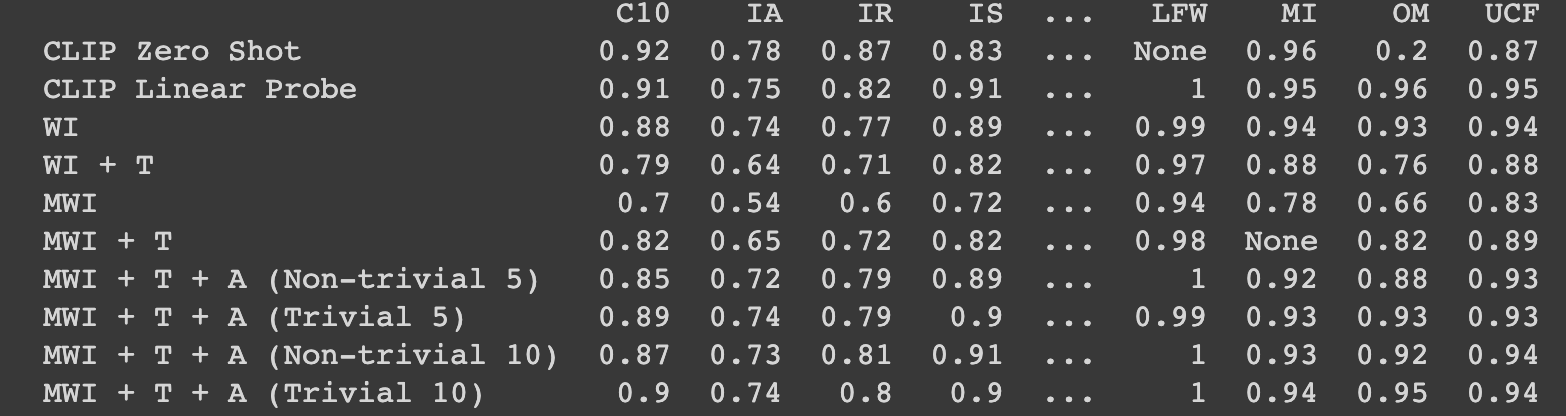

In [ ]:
def generate_table_template_11(df_clip_zs, df_clip_lp, df_nt_na_softmax, df_nt_na_sigmoid, df_t_na_sigmoid, df_t_ta_sigmoid, df_t_nta_sigmoid):

  labels = [
    "CLIP Zero Shot",
    "CLIP Linear Probe",
    "WI",
    "MWI",
    "MWI + T",
    "MWI + T + A (Non-trivial 5)",
    "MWI + T + A (Non-trivial 10)", 
    "MWI + T + A (Trivial 5)",
    "MWI + T + A (Trivial 10)",      
  ]

  df_nt_sigmoid = df_nt_na_sigmoid.filter(like='5 way 5 shot', axis=0)
  df_zs = df_clip_zs.filter(like='5 way 5 shot', axis=0)
  df_lp = df_clip_lp.filter(like='5 way 5 shot', axis=0)

  dfs = [df_zs, df_lp, df_nt_na_softmax, df_nt_sigmoid, df_t_na_sigmoid, df_t_nta_sigmoid, df_t_ta_sigmoid]

  #for df in dfs:
  #  print(df)

  combined_df = pd.concat(dfs)
  combined_df.index = labels

  sorted_labels = [
    "CLIP Zero Shot",
    "CLIP Linear Probe",
    "WI",
    "MWI",
    "MWI + T",
    "MWI + T + A (Non-trivial 5)",
    "MWI + T + A (Trivial 5)",
    "MWI + T + A (Non-trivial 10)", 
    "MWI + T + A (Trivial 10)",      
  ]

  combined_df = combined_df.reindex(sorted_labels)

  return combined_df

Table Template 12 Example

In [ ]:
def generate_table_template_12(num_ways, num_shot, metric, src_path=None, sort_datasets=True):
  if metric == "accuracy":
    metric_string = "Accuracy"
  if metric == 'f1_score':
    metric_string = "F1"

  filename = "1_SingleLabel_" + str(num_ways) + "w" + str(num_shot) + "s_" + metric_string + ".csv"
  filepath = os.path.join(src_path, "CLIPPER_paper_files", filename)

  df = pd.read_csv(filepath, index_col=0)
  # print(df)

  if sort_datasets:
    column_order = sorted(df.columns)
    df = df[column_order]
  
  df = df.T

  return df

Table Template 13 Example

In [ ]:
def generate_table_template_13(ds_type, softmax_metrics, sigmoid_metrics, src_path=None, transverse=False):
  num_shot = 5
  num_ways = 5
  model_name = "CLIP"
  metric_legend = {
      'f1_score': "F1", 
      'accuracy': "ACC", 
      'mean_class_accuracy': "CACC",
      'top1_accuracy': "TOP1"
      }
  
  rows = []
  idx = []

  ## Load from uploaded csv files
  if ds_type == "single":
    for metric in softmax_metrics:
      df_metric = get_single_label_data_from_csv(num_ways, num_shot, metric, src_path=src_path)
      r = df_metric.loc[model_name, :]

      if metric == 'accuracy':
        r = r/100

      rows.append(r)
      idx.append('SOFT ' + metric_legend[metric])

  ## Load from drive json files
  single_datasets = get_dataset_dict(ds_type=ds_type)
  # datasets = list(sorted(single_datasets.keys()))
  datasets = list(sorted(single_datasets.keys()))
  dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
  train = False # True or False
  num_aug = [0] # 0, 5, 10
  trivial_aug = False # True or False
  num_shot = [5] # 1, 5

  num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
  num_ways_isr = [5]
  num_ways_cifar = [5]

  softmax = False # Get sigmoid or softmax results
  continual = False # Continual or non continual setting, data format is different for each

  # Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
  # Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
  # Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
  sigmoid_metric_ids = {'f1_score': 'o_f1', 'top1_accuracy':'top1_accuracy', 'mean_class_accuracy':'c_accuracy'}
  num_digits = 2

  for metric in sigmoid_metrics:
    m = sigmoid_metric_ids[metric]
    df_metric = generate_table_template_17(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr, num_shot, m, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
    r = df_metric.loc[model_name, :]

    rows.append(r)
    idx.append('SIG ' + metric_legend[metric])

  
  df = pd.DataFrame(rows)
  df.index = idx
  df = df[dataset_ids]

  if transverse:
    return df
  else:
    return df.T

Table Template 14 Example

In [ ]:
# Single label
def generate_table_template_14(df_sota, df_clip_lin_acc, df_sig_nt_na_acc, df_sig_nt_na_f1, df_sig_t_ta_f1, df_sig_t_ta_cacc, df_sig_t_ta_top1acc):
  labels = [
      "SOTA (Acc)",
      "CLIP Lin (Acc)",
      "MWI (Acc)",
      "MWI (F1)",
      "+T +A (F1)",
      "+T +A (Acc)",
      "+T +A (Top-1 Acc)" 
    ]
    
  dfs = [df_sota, df_clip_lin_acc, df_sig_nt_na_acc, df_sig_nt_na_f1, df_sig_t_ta_f1, df_sig_t_ta_cacc, df_sig_t_ta_top1acc]

  #for df in dfs:
  #  print(df)

  combined_df = pd.concat(dfs)
  combined_df.index = labels
  return combined_df

Table 15 template

In [ ]:
def generate_table_template_15(dataset, aug_array, triv_array, num_ways, num_shot, num_eval, softmax, src_path=None):

  acc_values = []
  o_f1_values = []
  c_f1_values = []
  labels_values = []
  state_of_the_art = [.9283,.9283,.9283,.9283,.9283]
  
  dataset_prefix = dataset + "-Embeddings-18-05-21"

  for num_augmentations in aug_array:
    if num_augmentations == 0:
      trivial = False
      if trivial:
          if softmax:
            graph_filename = "new_metrics"+dataset+"_softmax_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_trivial_metrics_graphs.json"
          else:
            graph_filename = "new_metrics"+dataset+"_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_trivial_metrics_graphs.json"

      else:
          if softmax:
            graph_filename = "new_metrics"+dataset+"_softmax_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_metrics_graphs.json"
          else:
            graph_filename = "new_metrics"+dataset+"_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_metrics_graphs.json"

      filepath =  os.path.join(src_path, dataset_prefix, graph_filename)

      with open(filepath, 'r') as f:
              json_loaded = json.load(f)
              c_accuracy = json_loaded['c_accuracy']
              o_f1 = json_loaded["o_f1"]
              c_f1 = json_loaded["c_f1"]

      if trivial:
          label_name = str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_trivial"
      else :
          label_name = str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a"


      max_acc = max(c_accuracy[0])
      max_o_f1 = max(o_f1[0])
      max_c = max(c_f1[0])

      acc_values.append(max_acc)
      o_f1_values.append(max_o_f1)
      c_f1_values.append(max_c)
      labels_values.append(label_name)
    else:
      for trivial in triv_array:
        if trivial:
            if softmax:
              graph_filename = "new_metrics"+dataset+"_softmax_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_trivial_metrics_graphs.json"
            else:
              graph_filename = "new_metrics"+dataset+"_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_trivial_metrics_graphs.json"
        else:
            if softmax:
              graph_filename = "new_metrics"+dataset+"_softmax_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_metrics_graphs.json"
            else:
              graph_filename = "new_metrics"+dataset+"_"+str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_metrics_graphs.json"
        
        filepath =  os.path.join(src_path, dataset_prefix, graph_filename)

        with open(filepath, 'r') as f:
            json_loaded = json.load(f)
            c_accuracy = json_loaded['c_accuracy']
            o_f1 = json_loaded["o_f1"]
            c_f1 = json_loaded["c_f1"]

        if trivial:
          label_name = str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a_trivial"
        else :
          label_name = str(num_ways)+"w"+str(num_shot)+"s"+str(num_augmentations)+"a"

        max_acc = max(c_accuracy[0])
        max_o_f1 = max(o_f1[0])
        max_c = max(c_f1[0])

        acc_values.append(max_acc)
        o_f1_values.append(max_o_f1)
        c_f1_values.append(max_c)
        labels_values.append(label_name)

  data = {'accuracy': acc_values,
          'o_f1': o_f1_values,
          'state_of_the_art': state_of_the_art,
          'label': labels_values
        }
  df = pd.DataFrame(data,columns=['accuracy','o_f1','state_of_the_art','label'])
  return df

Table template 16

In [ ]:
def generate_table_template_16(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=None, num_digits=2, clip_sota_eval=None):
  c, r = len(datasets), len(num_ways_all)*len(num_shot);

  results = [[None for x in range(c)] for y in range(r)] 
  results_ind_labels = []

  # Get index labels
  for i, s in enumerate(num_shot):
    for j, w in enumerate(num_ways_all):
      index_label = str(w) + " way " + str(s) + " shot "
      results_ind_labels.append(index_label)

  # Iterate through all datasets
  for d, dataset in enumerate(datasets):

    if dataset == "isr" or dataset=="utk":
      num_ways = num_ways_isr_utk
    elif dataset == "cifar10":
      num_ways = num_ways_cifar
    else:
      num_ways = num_ways_all
    
    for a in num_aug:
      for i, s in enumerate(num_shot):
        for j, w in enumerate(num_ways):
          try:
            if "patch" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="patch")
            elif "full" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="full")
            else:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path)
            max_score, corr_threshold = get_max(data[metric], softmax)
            max_score = round(max_score, num_digits)
          except:
            max_score = None
            print("Unable to find data for: {}, {}, {}, {}, {}".format(dataset, w, s, "softmax" if softmax else "sigmoid", "train" if train else "No training"))
          
          ind = i * 2 + j 
          results[ind][d] = max_score

  formatted_results = np.array(results)
  formatted_results.shape
  df = pd.DataFrame(formatted_results, columns=dataset_ids, index=results_ind_labels)
  return df

Table template 17

In [ ]:
def generate_table_template_17(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=None, num_digits=2, clip_sota_eval=None):
  c, r = len(datasets), 1;

  results = [[None for x in range(c)]] 
  results_ind_labels = ["CLIP"]

  # Iterate through all datasets
  for d, dataset in enumerate(datasets):

    if dataset == "isr" or dataset=="utk":
      num_ways = num_ways_isr_utk
    elif dataset == "cifar10":
      num_ways = num_ways_cifar
    else:
      num_ways = num_ways_all
    
    for a in num_aug:
      for i, s in enumerate(num_shot):
        for j, w in enumerate(num_ways):
          try:
            if "patch" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="patch")
            elif "full" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="full")
            else:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path)
            max_score, corr_threshold = get_max(data[metric], softmax)
            max_score = round(max_score, num_digits)
          except:
            max_score = None
            print("Unable to find data for: {}, {}, {}, {}, {}".format(dataset, w, s, "softmax" if softmax else "sigmoid", "train" if train else "No training"))
          
          results[0][d] = max_score
    

  formatted_results = np.array(results)
  formatted_results.shape
  df = pd.DataFrame(formatted_results, columns = dataset_ids, index=results_ind_labels)
  return df

## Graph templates

Graph Template 1 Example

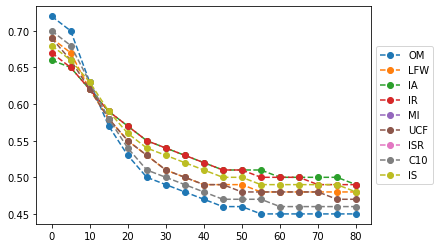

In [ ]:
def generate_graph_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=None, clip_sota_eval=None, num_digits=2, save_img=True, save_path=None, plot_title=None, plot_x_label=None, plot_y_label=None, legend_title=None):
  
  try:
    data = get_data_from_single_file(datasets[0], num_ways_all[0], num_shot[0], num_aug[0], trivial_aug, softmax, continual, train, src_path=src_path)
    num_thresholds = len(data[metric][1])
  except:
    raise Exception("Sample dataset file not found...")  


  c, r = num_thresholds, len(datasets)
  #print(num_thresholds)

  y = [[None for x in range(c)] for y in range(r)] 
  x_labels = [x * 5 for x in range(num_thresholds)]

  # Iterate through all datasets
  for d, dataset in enumerate(datasets):

    if dataset == "isr" or dataset=="utk":
      num_ways = num_ways_isr_utk
    elif dataset == "cifar10":
      num_ways = num_ways_cifar
    else:
      num_ways = num_ways_all

    for a in num_aug:
      for i, s in enumerate(num_shot):
        for j, w in enumerate(num_ways):
          try:
            if "patch" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="patch")
            elif "full" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="full")
            else:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path)
            threshold_values = data[metric][1]
          except:
            threshold_values = [None] * num_thresholds
            print("Unable to find data for: {}, {}, {}, {}, {}".format(dataset, w, s, "softmax" if softmax else "sigmoid", "train" if train else "No training"))
          
          #print(np.array(results).shape)
          #print(threshold_values)
          y[d] = threshold_values

  formatted_thresholds = np.array(y)

  for ind, y in enumerate(formatted_thresholds):
    ds_id = dataset_ids[ind]
    plt.plot(x_labels, y, label=ds_id, marker='o', linestyle=':')
  
  plt.legend(loc='center left', title=legend_title, bbox_to_anchor=(1.0, 0.5))
  plt.title(plot_title)
  plt.xlabel(plot_x_label)
  plt.ylabel(plot_y_label)

  min_y_val = max(np.min(formatted_thresholds) - 0.1, 0)
  max_y_val = min(np.max(formatted_thresholds) + 0.1, 1)

  plt.ylim(min_y_val, max_y_val)

  if save_img:
    plt.savefig(save_path)
   
  plt.show()

Alternative color map, same template as above

In [ ]:
def generate_graph_template_1b(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=None, clip_sota_eval=None, num_digits=2, save_img=True, save_path=None, plot_title=None, plot_x_label=None, plot_y_label=None, legend_title=None):
  
  try:
    data = get_data_from_single_file(datasets[0], num_ways_all[0], num_shot[0], num_aug[0], trivial_aug, softmax, continual, train, src_path=src_path)
    num_thresholds = len(data[metric][1])
  except:
    raise Exception("Sample dataset file not found...")  


  c, r = num_thresholds, len(datasets)
  #print(num_thresholds)

  y = [[None for x in range(c)] for y in range(r)] 
  x_labels = [x * 5 for x in range(num_thresholds)]

  # Iterate through all datasets
  for d, dataset in enumerate(datasets):

    if dataset == "isr" or dataset=="utk":
      num_ways = num_ways_isr_utk
    elif dataset == "cifar10":
      num_ways = num_ways_cifar
    else:
      num_ways = num_ways_all

    for a in num_aug:
      for i, s in enumerate(num_shot):
        for j, w in enumerate(num_ways):
          try:
            if "patch" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="patch")
            elif "full" in dataset:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path, full_patch="full")
            else:
              data = get_data_from_single_file(dataset, w, s, a, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=src_path)
            
            if "coco" in dataset or "imaterialist" in dataset:
              threshold_values = data[metric]
            else:
              threshold_values = data[metric][1]
          except:
            threshold_values = [None] * num_thresholds
            print("Unable to find data for: {}, {}, {}, {}, {}".format(dataset, w, s, "softmax" if softmax else "sigmoid", "train" if train else "No training"))
          
          #print(np.array(results).shape)
          #print(threshold_values)
          y[d] = threshold_values

  formatted_thresholds = np.array(y)
  number_of_plots=len(datasets)
  colormap = plt.cm.nipy_spectral
  colors = [colormap(i) for i in np.linspace(0, 1,number_of_plots)]

  for ind, y in enumerate(formatted_thresholds):
    ds_id = dataset_ids[ind]
    plt.plot(x_labels, y, label=ds_id, marker='o', linestyle=':', color=colors[ind])


  plt.legend(loc='center left', title=legend_title, bbox_to_anchor=(1.0, 0.5))
  plt.title(plot_title)
  plt.xlabel(plot_x_label)
  plt.ylabel(plot_y_label)

  #min_y_val = max(np.min(formatted_thresholds) - 0.1, 0)
  #max_y_val = min(np.max(formatted_thresholds) + 0.1, 1)

  #plt.ylim(min_y_val, max_y_val)

  if save_img:
    plt.savefig(save_path)
   
  plt.show()

Graph Template 2 Example

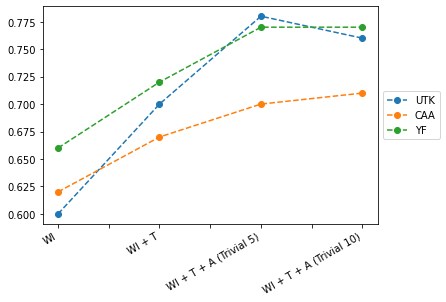

In [ ]:
def generate_graph_template_2(df_overview, softmax, save_img=True, save_path=None, plot_title=None, plot_x_label=None, plot_y_label=None, legend_title=None):
  df = df_overview.copy()

  if softmax:
    order_list = [
    "WI",
    "WI + T",
    "WI + T + A (Non-trivial 10)",
    "WI + T + A (Trivial 10)"     
  ]
  else:
    order_list = [
    "WI",
    "WI + T",
    "WI + T + A (Non-trivial 5)",
    "WI + T + A (Trivial 5)",
    "WI + T + A (Non-trivial 10)", 
    "WI + T + A (Trivial 10)",      
  ]

  df = df.reindex(order_list)

  df.plot.line(marker='o', linestyle=':', xlabel=plot_x_label, ylabel=plot_y_label).legend(loc='center left', title=legend_title, bbox_to_anchor=(1.0, 0.5))

  plt.xticks(rotation = 30, horizontalalignment='right')

  if save_img:
    plt.savefig(save_path)

Graph Template 3 Example

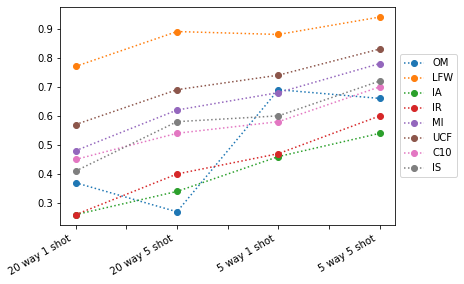

In [ ]:
def generate_graph_template_3(df_overview, softmax, save_img=True, save_path=None, plot_title=None, plot_x_label=None, plot_y_label=None, legend_title=None):
  df = df_overview.copy()
  order_list = ["20 way 1 shot ", "20 way 5 shot ", "5 way 1 shot ", "5 way 5 shot "]

  df = df.reindex(order_list)
  
  df.plot.line(marker='o', linestyle=':', xlabel=plot_x_label, ylabel=plot_y_label).legend(loc='center left', title=legend_title, bbox_to_anchor=(1.0, 0.5))

  plt.xticks(rotation = 30, horizontalalignment='right')

  if save_img:
    plt.savefig(save_path)

Graph Template 4 Example

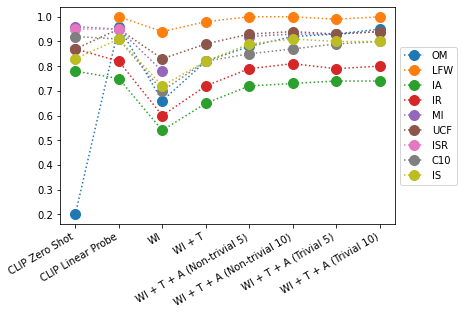

In [ ]:
def generate_graph_template_4(df_overview, softmax, save_img=True, save_path=None, plot_title=None, plot_x_label=None, plot_y_label=None, legend_title=None, rm_om_pt=True):
  df = df_overview.copy()

  if rm_om_pt:
    df["OM"]["CLIP Zero Shot"] = None

  df.plot.line(figsize=(13,6), marker='o', linestyle=':', xlabel=plot_x_label, ylabel=plot_y_label).legend(loc='center left', title=legend_title, bbox_to_anchor=(1.0, 0.5))

  plt.xticks(rotation = 30, horizontalalignment='right')

  if save_img:
    plt.savefig(save_path)

Graph Template 5 Example

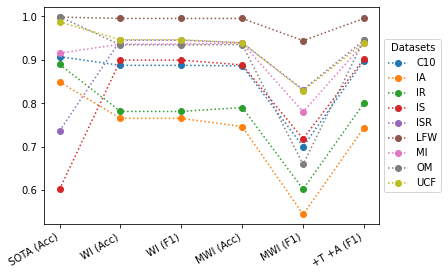

In [ ]:
def generate_graph_template_5(df_overview, save_img=True, save_path=None, plot_title=None, plot_x_label=None, plot_y_label=None, legend_title=None):
  df = df_overview.copy()

  df.plot.line(marker='o', linestyle=':', xlabel=plot_x_label, ylabel=plot_y_label).legend(loc='center left', title=legend_title, bbox_to_anchor=(1.0, 0.5))

  plt.xticks(rotation = 30, horizontalalignment='right')

  if save_img:
    plt.savefig(save_path)

Graph Template 6 Example

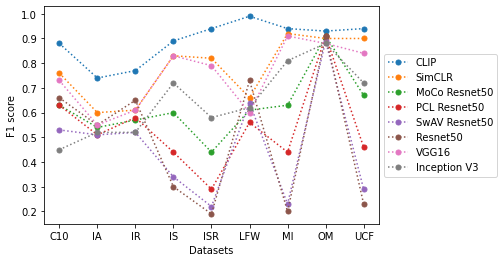

In [ ]:
def generate_graph_template_6(df_overview, save_img=True, save_path=None, plot_title=None, plot_x_label=None, plot_y_label=None, legend_title=None):
  df_overview.plot.line(marker='o', style=':', xlabel=plot_x_label, ylabel=plot_y_label, markersize=5).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

  if save_img:
    plt.savefig(save_path)

Graph template 7

In [ ]:
def generate_graph_template_7(df, save_img=True, save_path=None, plot_title=None, plot_x_label=None, plot_y_label=None, legend_title=None):
  df.plot.line(xlabel=plot_x_label, ylabel=plot_y_label, x="label", y=["state_of_the_art","accuracy",'o_f1'],marker='o', style=':', markersize=5).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
  
  if save_img:
    plt.savefig(save_path)

# Init & Constants

In [ ]:
path = "drive/MyDrive/PAL_HILL_2021/Experiments/"

# Results compilation

## Table 2

### Single Label Datasets

sota

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets))

scores = [[0.907, 0.849, 0.889, 0.602, 0.7362, 0.998, 0.915, 0.999, 0.987]]

df_sota = pd.DataFrame(scores, columns=dataset_ids)

In [ ]:
df_sota

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
0,0.907,0.849,0.889,0.602,0.7362,0.998,0.915,0.999,0.987


clip_lin_acc

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(single_datasets.keys())
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = True # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each
clip_sota_eval = "linear-probe" # zero-shot, "linear-probe", None

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'top1_accuracy'
num_digits = 2

In [ ]:
df_clip_lin_acc = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits, clip_sota_eval=clip_sota_eval)

drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/new_metricsOmniglot_softmax_5w1s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/new_metricsOmniglot_softmax_20w1s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/new_metricsOmniglot_softmax_5w5s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/new_metricsOmniglot_softmax_20w5s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/new_metricsLFW_softmax_5w1s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/new_metricsLFW_softmax_20w1s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/new_metricsLFW_softmax_5w5s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/new_metricsLFW_softmax_20w5s0a_clip_lp_

In [ ]:
df_clip_lin_acc = df_clip_lin_acc.filter(like='5 way 5 shot', axis=0)

sig_nt_na_acc

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'top1_accuracy'
num_digits = 3

In [ ]:
df_sig_nt_na_acc = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_nt_na_acc = df_sig_nt_na_acc.filter(like='5 way 5 shot', axis=0)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Em

In [ ]:
print(df_sig_nt_na_acc)

                 C10     IA    IR     IS    ISR    LFW     MI     OM    UCF
5 way 5 shot   0.886  0.746  0.79  0.888  0.939  0.995  0.938  0.935  0.939


sig_nt_na_f1

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'o_f1'
num_digits = 3

In [ ]:
df_sig_nt_na_f1 = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_nt_na_f1 = df_sig_nt_na_f1.filter(like='5 way 5 shot', axis=0)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Em

In [ ]:
print(df_sig_nt_na_f1)

               C10     IA     IR     IS    ISR    LFW    MI     OM    UCF
5 way 5 shot   0.7  0.544  0.602  0.718  0.831  0.944  0.78  0.659  0.829


sig_t_ta_f1

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 3

In [ ]:
df_sig_t_ta_f1 = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_t_ta_f1 = df_sig_t_ta_f1.tail(1)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s10a_triv

In [ ]:
print(df_sig_t_ta_f1)

                    C10     IA   IR     IS    ISR    LFW     MI     OM    UCF
10 augmentations  0.898  0.743  0.8  0.902  0.945  0.995  0.938  0.946  0.939


sig_t_ta_top1acc

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "top1_accuracy"
num_digits = 3

In [ ]:
df_sig_t_ta_top1acc = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_t_ta_top1acc = df_sig_t_ta_top1acc.tail(1)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s10a_triv

In [ ]:
print(df_sig_t_ta_top1acc)

                    C10     IA     IR     IS    ISR    LFW     MI     OM    UCF
10 augmentations  0.913  0.765  0.835  0.918  0.958  0.997  0.954  0.966  0.953


sig_t_ta_cacc

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "c_accuracy"
num_digits = 3

In [ ]:
df_sig_t_ta_cacc = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_t_ta_cacc = df_sig_t_ta_cacc.tail(1)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s10a_triv

In [ ]:
print(df_sig_t_ta_cacc)

                   C10     IA     IR     IS    ISR    LFW     MI     OM    UCF
10 augmentations  0.96  0.898  0.924  0.961  0.978  0.998  0.976  0.978  0.976


summary

In [ ]:
df_sota_single = generate_table_template_14(df_sota, df_clip_lin_acc, df_sig_nt_na_acc, df_sig_nt_na_f1, df_sig_t_ta_f1, df_sig_t_ta_cacc, df_sig_t_ta_top1acc)

In [ ]:
print(df_sota_single)

                     C10     IA     IR     IS  ...    LFW     MI     OM    UCF
SOTA (Acc)         0.907  0.849  0.889  0.602  ...  0.998  0.915  0.999  0.987
CLIP Lin (Acc)     0.910  0.750  0.820  0.910  ...  1.000  0.950  0.960  0.950
MWI (Acc)          0.886  0.746  0.790  0.888  ...  0.995  0.938  0.935  0.939
MWI (F1)           0.700  0.544  0.602  0.718  ...  0.944  0.780  0.659  0.829
+T +A (F1)         0.898  0.743  0.800  0.902  ...  0.995  0.938  0.946  0.939
+T +A (Acc)        0.960  0.898  0.924  0.961  ...  0.998  0.976  0.978  0.976
+T +A (Top-1 Acc)  0.913  0.765  0.835  0.918  ...  0.997  0.954  0.966  0.953

[7 rows x 9 columns]


### Multi Label Datasets

sota

In [ ]:
multi_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(multi_datasets.keys()))
dataset_ids = list(map(lambda x: multi_datasets[x][2], datasets))

scores = [[0.82, 0.837, 0.837, 0.719, 0.719, 0.859, 0.850]]

df_sota = pd.DataFrame(scores, columns=dataset_ids)

In [ ]:
df_sota

,CAA,COCO_F,COCO_P,IM_F,IM_P,UTK,YF
0,0.82,0.837,0.837,0.719,0.719,0.859,0.85


sig_nt_na_acc

In [ ]:
single_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'c_accuracy'
num_digits = 3

In [ ]:
df_sig_nt_na_acc = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_nt_na_acc = df_sig_nt_na_acc.filter(like='5 way 5 shot', axis=0)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t20w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t5w1s0a_metrics_with_logits.json
list index out of range
Unable to find data for: coco_full, 5, 1, sigmoid, No training
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t20w1s0a_metrics_with_logits.json
list index out of range
Unable to find data for: coco_full, 20, 1, sigmoid, No training
drive/MyDrive/PAL_HILL_2021/Experime

In [ ]:
print(df_sig_nt_na_acc)

                 CAA  COCO_F COCO_P  IM_F  IM_P    UTK     YF
5 way 5 shot   0.692  0.8824   None  None  None  0.742  0.875


sig_nt_na_f1

In [ ]:
single_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'o_f1'
num_digits = 3

In [ ]:
df_sig_nt_na_f1 = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_nt_na_f1 = df_sig_nt_na_f1.filter(like='5 way 5 shot', axis=0)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t20w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t5w1s0a_metrics_with_logits.json
list index out of range
Unable to find data for: coco_full, 5, 1, sigmoid, No training
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t20w1s0a_metrics_with_logits.json
list index out of range
Unable to find data for: coco_full, 20, 1, sigmoid, No training
drive/MyDrive/PAL_HILL_2021/Experime

In [ ]:
print(df_sig_nt_na_f1)

                 CAA   COCO_F COCO_P  IM_F  IM_P    UTK     YF
5 way 5 shot   0.619  0.74933   None  None  None  0.601  0.657


sig_t_ta_f1

In [ ]:
single_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 3

In [ ]:
df_sig_t_ta_f1 = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_t_ta_f1 = df_sig_t_ta_f1.tail(1)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_5w5s10a_trivial_metrics_with_logits.json
Max o_f1 = 0.730784089515476
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Patch_Patch_5w5s10a_trivial_metrics_with_logits.json
Max o_f1 = 0.663890193972858
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Full_Full_5w5s10a_trivial_metrics_with_logits.json
Max o_f1 = 0.40722063297412403
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Patch_Patch_5w5s10a_trivial_metrics_with_logits.json
Max o_f1 = 0.5626079747565833
drive/MyDrive/PAL_HILL_2021/Experiments/UTKFaces-Embeddings-23-03-21/new_metricsUTKFaces_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Yal

In [ ]:
print(df_sig_t_ta_f1)

                    CAA    COCO_F   COCO_P      IM_F      IM_P    UTK     YF
10 augmentations  0.693  0.730784  0.66389  0.407221  0.562608  0.784  0.791


sig_t_ta_acc

In [ ]:
single_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "c_accuracy"
num_digits = 3

In [ ]:
df_sig_t_ta_acc = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_t_ta_acc = df_sig_t_ta_acc.tail(1)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_5w5s10a_trivial_metrics_with_logits.json
Max c_accuracy = 0.8816
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Patch_Patch_5w5s10a_trivial_metrics_with_logits.json
Max c_accuracy = 0.8771522594854362
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Full_Full_5w5s10a_trivial_metrics_with_logits.json
Max c_accuracy = 0.7624000000000001
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Patch_Patch_5w5s10a_trivial_metrics_with_logits.json
Max c_accuracy = 0.8343999999999999
drive/MyDrive/PAL_HILL_2021/Experiments/UTKFaces-Embeddings-23-03-21/new_metricsUTKFaces_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Ex

In [ ]:
print(df_sig_t_ta_acc)

                    CAA  COCO_F    COCO_P    IM_F    IM_P    UTK     YF
10 augmentations  0.758  0.8816  0.877152  0.7624  0.8344  0.864  0.913


summary

In [ ]:
df_sota_multi = generate_table_template_10(df_sota, df_sig_nt_na_acc, df_sig_nt_na_f1, df_sig_t_ta_f1, df_sig_t_ta_acc)

In [ ]:
# Add missing values
df_sota_multi["COCO_F"]["+T +A (F1)"] = 0.73
df_sota_multi["COCO_P"]["+T +A (F1)"] = 0.66
df_sota_multi["IM_F"]["+T +A (F1)"] = 0.41
df_sota_multi["IM_P"]["+T +A (F1)"] = 0.56

df_sota_multi["COCO_F"]["+T +A (Acc)"] = 0.8872
df_sota_multi["COCO_P"]["+T +A (Acc)"] = 0.8772
df_sota_multi["IM_F"]["+T +A (Acc)"] = 0.7744
df_sota_multi["IM_P"]["+T +A (Acc)"] = 0.8344

In [ ]:
print(df_sota_multi)

               CAA   COCO_F  COCO_P    IM_F    IM_P    UTK     YF
SOTA (Acc)    0.82    0.837   0.837   0.719   0.719  0.859   0.85
MWI (Acc)    0.692   0.8824    None    None    None  0.742  0.875
MWI (F1)     0.619  0.74933    None    None    None  0.601  0.657
+T +A (F1)   0.693     0.73    0.66    0.41    0.56  0.784  0.791
+T +A (Acc)  0.758   0.8872  0.8772  0.7744  0.8344  0.864  0.913


In [ ]:
df_sota_multi = df_sota_multi.astype(float).round(2)

In [ ]:
df = df_sota_multi[:1].append(pd.Series(name="CLIP Lin (Acc)"))
df = pd.concat([df, df_sota_multi[1:]])
df_sota_multi = df.append(pd.Series(name="+T +A (Top-1 Acc)"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


### Combining

In [ ]:
df_sota_single

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
SOTA (Acc),0.907,0.849,0.889,0.602,0.7362,0.998,0.915,0.999,0.987
CLIP Lin (Acc),0.910,0.750,0.820,0.910,0.9500,1.000,0.950,0.960,0.950
MWI (Acc),0.886,0.746,0.790,0.888,0.9390,0.995,0.938,0.935,0.939
MWI (F1),0.700,0.544,0.602,0.718,0.8310,0.944,0.780,0.659,0.829
+T +A (F1),0.898,0.743,0.800,0.902,0.9450,0.995,0.938,0.946,0.939
+T +A (Acc),0.960,0.898,0.924,0.961,0.9780,0.998,0.976,0.978,0.976
+T +A (Top-1 Acc),0.913,0.765,0.835,0.918,0.9580,0.997,0.954,0.966,0.953


In [ ]:
df_sota_multi

,CAA,COCO_F,COCO_P,IM_F,IM_P,UTK,YF
SOTA (Acc),0.82,0.84,0.84,0.72,0.72,0.86,0.85
CLIP Lin (Acc),NaN,NaN,NaN,NaN,NaN,NaN,NaN
MWI (Acc),0.69,0.88,NaN,NaN,NaN,0.74,0.88
MWI (F1),0.62,0.75,NaN,NaN,NaN,0.60,0.66
+T +A (F1),0.69,0.73,0.66,0.41,0.56,0.78,0.79
+T +A (Acc),0.76,0.89,0.88,0.77,0.83,0.86,0.91
+T +A (Top-1 Acc),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_combined = pd.concat([df_sota_single, df_sota_multi], axis=1)
df_combined

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF,CAA,COCO_F,COCO_P,IM_F,IM_P,UTK,YF
SOTA (Acc),0.907,0.849,0.889,0.602,0.7362,0.998,0.915,0.999,0.987,0.82,0.84,0.84,0.72,0.72,0.86,0.85
CLIP Lin (Acc),0.910,0.750,0.820,0.910,0.9500,1.000,0.950,0.960,0.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MWI (Acc),0.886,0.746,0.790,0.888,0.9390,0.995,0.938,0.935,0.939,0.69,0.88,NaN,NaN,NaN,0.74,0.88
MWI (F1),0.700,0.544,0.602,0.718,0.8310,0.944,0.780,0.659,0.829,0.62,0.75,NaN,NaN,NaN,0.60,0.66
+T +A (F1),0.898,0.743,0.800,0.902,0.9450,0.995,0.938,0.946,0.939,0.69,0.73,0.66,0.41,0.56,0.78,0.79
+T +A (Acc),0.960,0.898,0.924,0.961,0.9780,0.998,0.976,0.978,0.976,0.76,0.89,0.88,0.77,0.83,0.86,0.91
+T +A (Top-1 Acc),0.913,0.765,0.835,0.918,0.9580,0.997,0.954,0.966,0.953,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
labels = [
      "SOTA (Acc)",
      "CLIP Lin (Acc)",
      "MWI (Acc)",
      "MWI (F1)",
      "+T +A (F1)",
      "+T +A (Class Acc)",
      "+T +A (Top-1/mAP)" 
    ]
df_combined.index = labels

In [ ]:
print(df_combined)

                     C10     IA     IR     IS  ...  IM_F  IM_P   UTK    YF
SOTA (Acc)         0.907  0.849  0.889  0.602  ...  0.72  0.72  0.86  0.85
CLIP Lin (Acc)     0.910  0.750  0.820  0.910  ...   NaN   NaN   NaN   NaN
MWI (Acc)          0.886  0.746  0.790  0.888  ...   NaN   NaN  0.74  0.88
MWI (F1)           0.700  0.544  0.602  0.718  ...   NaN   NaN  0.60  0.66
+T +A (F1)         0.898  0.743  0.800  0.902  ...  0.41  0.56  0.78  0.79
+T +A (Class Acc)  0.960  0.898  0.924  0.961  ...  0.77  0.83  0.86  0.91
+T +A (Top-1/mAP)  0.913  0.765  0.835  0.918  ...   NaN   NaN   NaN   NaN

[7 rows x 16 columns]


In [ ]:
save_path="Table-2.csv"
df_combined.to_csv(save_path)

## Figure 2.1


### Generate df

In [ ]:
num_ways = 5 # [5, 20]
num_shot = 5 # [5, 1]
metric = 'f1_score' # ['f1_score', 'accuracy']
save_path = "Figure-2-1.csv"

In [ ]:
df = generate_table_template_12(num_ways, num_shot, metric, src_path=path)

In [ ]:
print(df)

     CLIP  SimCLR  MoCo Resnet50  ...  Resnet50  VGG16  Inception V3
C10  0.88    0.76           0.63  ...      0.66   0.73          0.45
IA   0.74    0.60           0.54  ...      0.55   0.55          0.52
IR   0.77    0.61           0.57  ...      0.65   0.61          0.52
IS   0.89    0.83           0.60  ...      0.30   0.83          0.72
ISR  0.94    0.82           0.44  ...      0.19   0.79          0.58
LFW  0.99    0.66           0.61  ...      0.73   0.60          0.62
MI   0.94    0.92           0.63  ...      0.20   0.91          0.81
OM   0.93    0.90           0.91  ...      0.91   0.88          0.88
UCF  0.94    0.90           0.67  ...      0.23   0.84          0.72

[9 rows x 8 columns]


In [ ]:
df.to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "Figure-2-1.png"
plot_title = None
plot_x_label = 'Datasets'
plot_y_label = 'F1 score'
legend_title= "Models" 

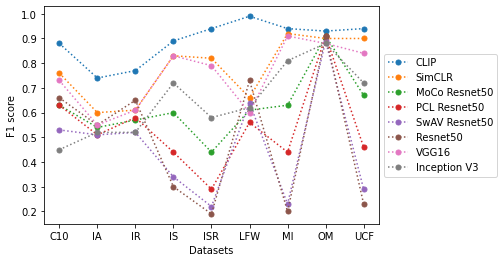

In [ ]:
generate_graph_template_6(df, save_img=save_img, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

## Figure 2.2


### Generate df

df_nt_na_softmax

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets))

In [ ]:
w = 5
s = 5
m = 'f1_score'

df_nt_na_softmax = get_single_label_data_from_csv(w, s, m, src_path=path)
df_nt_na_softmax = df_nt_na_softmax.head(1)
df_nt_na_softmax = df_nt_na_softmax[dataset_ids]
df_nt_na_softmax= df_nt_na_softmax.round(3)
df_nt_na_softmax

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
CLIP,0.88,0.74,0.77,0.89,0.94,0.99,0.94,0.93,0.94


df_nt_na_sigmoid

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'o_f1'
num_digits = 2

In [ ]:
df_nt_na_sigmoid = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Em

In [ ]:
df_nt_na_sigmoid

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
5 way 1 shot,0.58,0.46,0.47,0.60,0.71,0.88,0.68,0.69,0.74
20 way 1 shot,0.45,0.26,0.26,0.41,0.57,0.77,0.48,0.37,0.57
5 way 5 shot,0.70,0.54,0.60,0.72,0.83,0.94,0.78,0.66,0.83
20 way 5 shot,0.54,0.34,0.40,0.58,0.72,0.89,0.62,0.27,0.69


df_t_na_sigmoid

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'o_f1'
num_digits = 2

In [ ]:
df_t_na_sigmoid = generate_table_template_2(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/IndoorSceneRecognition-Embeddings-28-02-21/new_metricsISR_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/new_metricsLFW_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/MiniImagenet-Embeddings-28-02-21/new_metricsMiniImagenet_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/new_metricsOmniglot_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/UCF101-Embe

In [ ]:
df_t_na_sigmoid

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
CLIP,0.82,0.65,0.72,0.82,0.91,0.98,0.89,0.82,0.89


df_t_ta_sigmoid

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'o_f1'
num_digits = 2

In [ ]:
df_t_ta_sigmoid = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s10a_triv

In [ ]:
df_t_ta_sigmoid

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
5 augmentations,0.89,0.74,0.79,0.9,0.94,0.99,0.93,0.93,0.93
10 augmentations,0.90,0.74,0.80,0.9,0.95,1.00,0.94,0.95,0.94


df_t_nta_sigmoid 

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'o_f1'
num_digits = 2

In [ ]:
df_t_nta_sigmoid = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s5a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s10a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s5a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s10a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s5a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s10a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s5a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s10a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/

In [ ]:
df_t_nta_sigmoid 

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
5 augmentations,0.85,0.72,0.79,0.89,0.95,1.0,0.92,0.88,0.93
10 augmentations,0.87,0.73,0.81,0.91,0.95,1.0,0.93,0.92,0.94


df_clip_lp_f1

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = True # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each
clip_sota_eval = "linear-probe" # zero-shot, "linear-probe", None

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'o_f1'
num_digits = 2

In [ ]:
df_clip_lp_f1 = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits, clip_sota_eval=clip_sota_eval)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_softmax_5w1s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_softmax_10w1s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_softmax_5w5s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_softmax_10w5s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_softmax_5w1s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_softmax_20w1s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_softmax_5w5s0a_clip_lp_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_m

In [ ]:
df_clip_lp_f1

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
5 way 1 shot,0.71,0.53,0.56,0.72,0.82,0.96,0.79,0.83,0.83
20 way 1 shot,0.60,0.33,0.36,0.56,0.72,0.90,0.61,0.66,0.68
5 way 5 shot,0.91,0.75,0.82,0.91,0.95,1.00,0.95,0.96,0.95
20 way 5 shot,0.85,0.56,0.65,0.80,0.91,0.99,0.86,0.87,0.87


df_clip_zs_f1

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each
clip_sota_eval = "zero-shot" # zero-shot, "linear-probe", None

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'o_f1'
num_digits = 2


In [ ]:
df_clip_zs_f1 = generate_table_template_7(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits, clip_sota_eval=clip_sota_eval)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w1s0a_clip_zs_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w1s0a_clip_zs_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w5s0a_clip_zs_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w5s0a_clip_zs_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w1s0a_clip_zs_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w1s0a_clip_zs_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w5s0a_clip_zs_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w5s0a_clip_zs_metrics_

In [ ]:
df_clip_zs_f1

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
5 way 1 shot,0.92,0.78,0.87,0.84,0.95,0.91,0.96,0.20,0.86
20 way 1 shot,0.86,0.62,0.76,0.70,0.88,0.81,0.90,0.05,0.76
5 way 5 shot,0.92,0.78,0.87,0.83,0.95,0.91,0.96,0.20,0.87
20 way 5 shot,0.86,0.61,0.75,0.71,0.89,0.80,0.90,0.05,0.76


In [ ]:
save_path = "Figure-2-2.csv"
softmax = False

In [ ]:
df_clip_comp_f1_single = generate_table_template_11(df_clip_zs_f1, df_clip_lp_f1, df_nt_na_softmax, df_nt_na_sigmoid, df_t_na_sigmoid, df_t_ta_sigmoid, df_t_nta_sigmoid)

In [ ]:
print(df_clip_comp_f1_single)

                               C10    IA    IR    IS  ...   LFW    MI    OM   UCF
CLIP Zero Shot                0.92  0.78  0.87  0.83  ...  0.91  0.96  0.20  0.87
CLIP Linear Probe             0.91  0.75  0.82  0.91  ...  1.00  0.95  0.96  0.95
WI                            0.88  0.74  0.77  0.89  ...  0.99  0.94  0.93  0.94
MWI                           0.70  0.54  0.60  0.72  ...  0.94  0.78  0.66  0.83
MWI + T                       0.82  0.65  0.72  0.82  ...  0.98  0.89  0.82  0.89
MWI + T + A (Non-trivial 5)   0.85  0.72  0.79  0.89  ...  1.00  0.92  0.88  0.93
MWI + T + A (Trivial 5)       0.89  0.74  0.79  0.90  ...  0.99  0.93  0.93  0.93
MWI + T + A (Non-trivial 10)  0.87  0.73  0.81  0.91  ...  1.00  0.93  0.92  0.94
MWI + T + A (Trivial 10)      0.90  0.74  0.80  0.90  ...  1.00  0.94  0.95  0.94

[9 rows x 9 columns]


In [ ]:
df_clip_comp_f1_single.to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "Figure-2-2.png"
plot_title = None
plot_x_label = None 
plot_y_label = "F1 Score"
legend_title="Datasets" 
softmax = False
rm_om_pt = True

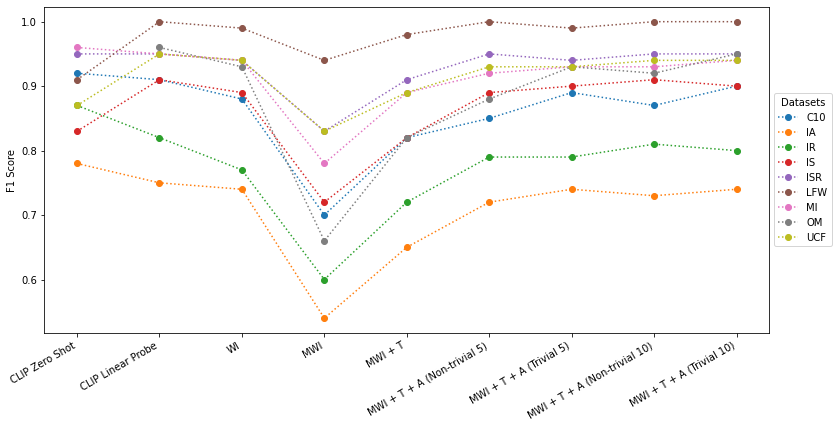

In [ ]:
generate_graph_template_4(df_clip_comp_f1_single, softmax, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, rm_om_pt=rm_om_pt, legend_title=legend_title)

## Figure 3.1


### Generate df

sota

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets))

scores = [[0.907, 0.849, 0.889, 0.602, 0.7362, 0.998, 0.915, 0.999, 0.987]]

df_sota = pd.DataFrame(scores, columns=dataset_ids)

In [ ]:
df_sota

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
0,0.907,0.849,0.889,0.602,0.7362,0.998,0.915,0.999,0.987


sof_nt_na_acc 

In [ ]:
w = 5
s = 5
m = "accuracy"

df_sof_nt_na_acc = get_single_label_data_from_csv(w, s, m, src_path=path)
df_sof_nt_na_acc = df_sof_nt_na_acc.head(1)
df_sof_nt_na_acc = df_sof_nt_na_acc[dataset_ids]
df_sof_nt_na_acc = df_sof_nt_na_acc.div(100).round(3)
df_sof_nt_na_acc

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
CLIP,0.887,0.765,0.781,0.899,0.945,0.995,0.936,0.934,0.946


sof_nt_na_f1

In [ ]:
w = 5
s = 5
m = 'f1_score'

df_sof_nt_na_f1 = get_single_label_data_from_csv(w, s, m, src_path=path)
df_sof_nt_na_f1 = df_sof_nt_na_f1.head(1)
df_sof_nt_na_f1 = df_sof_nt_na_f1[dataset_ids]
df_sof_nt_na_f1 = df_sof_nt_na_f1.round(3)
df_sof_nt_na_f1

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
CLIP,0.88,0.74,0.77,0.89,0.94,0.99,0.94,0.93,0.94


sig_nt_na_acc

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'top1_accuracy'
num_digits = 3

In [ ]:
df_sig_nt_na_acc = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_nt_na_acc = df_sig_nt_na_acc.filter(like='5 way 5 shot', axis=0)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Em

In [ ]:
print(df_sig_nt_na_acc)

                 C10     IA    IR     IS    ISR    LFW     MI     OM    UCF
5 way 5 shot   0.886  0.746  0.79  0.888  0.939  0.995  0.938  0.935  0.939


sig_nt_na_f1

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'o_f1'
num_digits = 3

In [ ]:
df_sig_nt_na_f1 = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_nt_na_f1 = df_sig_nt_na_f1.filter(like='5 way 5 shot', axis=0)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Em

In [ ]:
print(df_sig_nt_na_f1)

               C10     IA     IR     IS    ISR    LFW    MI     OM    UCF
5 way 5 shot   0.7  0.544  0.602  0.718  0.831  0.944  0.78  0.659  0.829


sig_t_ta_f1

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 3

In [ ]:
df_sig_t_ta_f1 = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_t_ta_f1 = df_sig_t_ta_f1.tail(1)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s10a_triv

In [ ]:
print(df_sig_t_ta_f1)

                    C10     IA   IR     IS    ISR    LFW     MI     OM    UCF
10 augmentations  0.898  0.743  0.8  0.902  0.945  0.995  0.938  0.946  0.939


sig_t_ta_top1acc

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "top1_accuracy"
num_digits = 3

In [ ]:
df_sig_t_ta_top1acc = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_t_ta_top1acc = df_sig_t_ta_top1acc.tail(1)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s10a_triv

In [ ]:
print(df_sig_t_ta_top1acc)

                    C10     IA     IR     IS    ISR    LFW     MI     OM    UCF
10 augmentations  0.913  0.765  0.835  0.918  0.958  0.997  0.954  0.966  0.953


sig_t_ta_cacc

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "c_accuracy"
num_digits = 3

In [ ]:
df_sig_t_ta_cacc = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_t_ta_cacc = df_sig_t_ta_cacc.tail(1)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s10a_triv

In [ ]:
print(df_sig_t_ta_cacc)

                   C10     IA     IR     IS    ISR    LFW     MI     OM    UCF
10 augmentations  0.96  0.898  0.924  0.961  0.978  0.998  0.976  0.978  0.976


summary

In [ ]:
df_sota_single = generate_table_template_9(df_sota, df_sof_nt_na_acc, df_sof_nt_na_f1, df_sig_nt_na_acc, df_sig_nt_na_f1, df_sig_t_ta_f1, df_sig_t_ta_top1acc, df_sig_t_ta_cacc)

In [ ]:
print(df_sota_single)

                     C10     IA     IR     IS  ...    LFW     MI     OM    UCF
SOTA (Acc)         0.907  0.849  0.889  0.602  ...  0.998  0.915  0.999  0.987
WI (Acc)           0.887  0.765  0.781  0.899  ...  0.995  0.936  0.934  0.946
WI (F1)            0.880  0.740  0.770  0.890  ...  0.990  0.940  0.930  0.940
MWI (Acc)          0.886  0.746  0.790  0.888  ...  0.995  0.938  0.935  0.939
MWI (F1)           0.700  0.544  0.602  0.718  ...  0.944  0.780  0.659  0.829
+T +A (F1)         0.898  0.743  0.800  0.902  ...  0.995  0.938  0.946  0.939
+T +A (Top-1 Acc)  0.913  0.765  0.835  0.918  ...  0.997  0.954  0.966  0.953
+T +A (Class Acc)  0.960  0.898  0.924  0.961  ...  0.998  0.976  0.978  0.976

[8 rows x 9 columns]


In [ ]:
save_path = "Figure-3-1.csv"
df_sota_single.round(2).to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "Figure-3-1.png"
plot_title = None
plot_x_label = None
plot_y_label = None
legend_title="Datasets" 
softmax = False

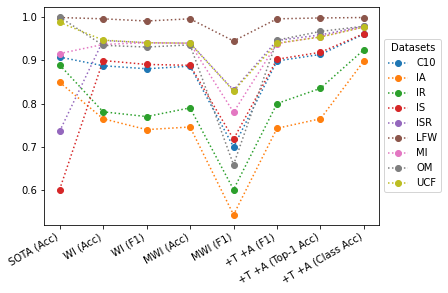

In [ ]:
generate_graph_template_5(df_sota_single, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

## Figure 3.2

### Generate df

sota

In [ ]:
multi_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(multi_datasets.keys()))
dataset_ids = list(map(lambda x: multi_datasets[x][2], datasets))

scores = [[0.82, 0.837, 0.837, 0.719, 0.719, 0.859, 0.850]]

df_sota = pd.DataFrame(scores, columns=dataset_ids)

In [ ]:
df_sota

,CAA,COCO_F,COCO_P,IM_F,IM_P,UTK,YF
0,0.82,0.837,0.837,0.719,0.719,0.859,0.85


sig_nt_na_acc

In [ ]:
single_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'c_accuracy'
num_digits = 3

In [ ]:
df_sig_nt_na_acc = generate_table_template_16(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_nt_na_acc = df_sig_nt_na_acc.filter(like='5 way 5 shot', axis=0)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t20w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t20w5s0a_

In [ ]:
print(df_sig_nt_na_acc)

                 CAA  COCO_F  COCO_P   IM_F   IM_P    UTK     YF
5 way 5 shot   0.692   0.882   0.767  0.754  0.793  0.741  0.875


sig_nt_na_f1

In [ ]:
single_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = 'o_f1'
num_digits = 3

In [ ]:
df_sig_nt_na_f1 = generate_table_template_16(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_nt_na_f1 = df_sig_nt_na_f1.filter(like='5 way 5 shot', axis=0)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t20w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t20w5s0a_

In [ ]:
print(df_sig_nt_na_f1)

                 CAA  COCO_F  COCO_P   IM_F   IM_P    UTK     YF
5 way 5 shot   0.619   0.749    0.44  0.395  0.481  0.601  0.657


sig_t_ta_f1

In [ ]:
single_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 3

In [ ]:
df_sig_t_ta_f1 = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_t_ta_f1 = df_sig_t_ta_f1.tail(1)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_5w5s10a_trivial_metrics_with_logits.json
Max o_f1 = 0.730784089515476
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Patch_Patch_5w5s10a_trivial_metrics_with_logits.json
Max o_f1 = 0.663890193972858
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Full_Full_5w5s10a_trivial_metrics_with_logits.json
Max o_f1 = 0.40722063297412403
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Patch_Patch_5w5s10a_trivial_metrics_with_logits.json
Max o_f1 = 0.5626079747565833
drive/MyDrive/PAL_HILL_2021/Experiments/UTKFaces-Embeddings-23-03-21/new_metricsUTKFaces_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Yal

In [ ]:
print(df_sig_t_ta_f1)

                    CAA    COCO_F   COCO_P      IM_F      IM_P    UTK     YF
10 augmentations  0.693  0.730784  0.66389  0.407221  0.562608  0.784  0.791


sig_t_ta_acc

In [ ]:
single_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "c_accuracy"
num_digits = 3

In [ ]:
df_sig_t_ta_acc = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)
df_sig_t_ta_acc = df_sig_t_ta_acc.tail(1)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_5w5s10a_trivial_metrics_with_logits.json
Max c_accuracy = 0.8816
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Patch_Patch_5w5s10a_trivial_metrics_with_logits.json
Max c_accuracy = 0.8771522594854362
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Full_Full_5w5s10a_trivial_metrics_with_logits.json
Max c_accuracy = 0.7624000000000001
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Patch_Patch_5w5s10a_trivial_metrics_with_logits.json
Max c_accuracy = 0.8343999999999999
drive/MyDrive/PAL_HILL_2021/Experiments/UTKFaces-Embeddings-23-03-21/new_metricsUTKFaces_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Ex

In [ ]:
print(df_sig_t_ta_acc)

                    CAA  COCO_F    COCO_P    IM_F    IM_P    UTK     YF
10 augmentations  0.758  0.8816  0.877152  0.7624  0.8344  0.864  0.913


summary

In [ ]:
df_sota_multi = generate_table_template_10(df_sota, df_sig_nt_na_acc, df_sig_nt_na_f1, df_sig_t_ta_f1, df_sig_t_ta_acc)

In [ ]:
print(df_sota_multi)

               CAA    COCO_F    COCO_P      IM_F      IM_P    UTK     YF
SOTA (Acc)   0.820  0.837000  0.837000  0.719000  0.719000  0.859  0.850
MWI (Acc)    0.692  0.882000  0.767000  0.754000  0.793000  0.741  0.875
MWI (F1)     0.619  0.749000  0.440000  0.395000  0.481000  0.601  0.657
+T +A (F1)   0.693  0.730784  0.663890  0.407221  0.562608  0.784  0.791
+T +A (Acc)  0.758  0.881600  0.877152  0.762400  0.834400  0.864  0.913


In [ ]:
save_path = "Figure-3-2.csv"
df_sota_multi = df_sota_multi.astype(float).round(2)
df_sota_multi.to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "Figure-3-2.png"
plot_title = None
plot_x_label = None
plot_y_label = None
legend_title="Datasets" 
softmax = False

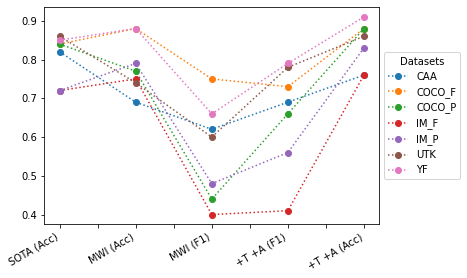

In [ ]:
generate_graph_template_5(df_sota_multi, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

## Figure 4.1


### Generate df

In [ ]:
softmax_metrics = ['accuracy', 'f1_score']
sigmoid_metrics = ['f1_score', 'top1_accuracy', 'mean_class_accuracy']
ds_type = "single"

save_path = "Figure-4-1.csv"

In [ ]:
df = generate_table_template_13(ds_type, softmax_metrics, sigmoid_metrics, src_path=path, transverse=True)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/IndoorSceneRecognition-Embeddings-28-02-21/new_metricsISR_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/new_metricsLFW_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/MiniImagenet-Embeddings-28-02-21/new_metricsMiniImagenet_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/new_metricsOmniglot_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experim

In [ ]:
print(df.round(2))

           C10    IA    IR    IS   ISR   LFW    MI    OM   UCF
SOFT ACC  0.89  0.77  0.78  0.90  0.94  1.00  0.94  0.93  0.95
SOFT F1   0.88  0.74  0.77  0.89  0.94  0.99  0.94  0.93  0.94
SIG F1    0.70  0.54  0.60  0.72  0.83  0.94  0.78  0.66  0.83
SIG TOP1  0.89  0.75  0.79  0.89  0.94  0.99  0.94  0.93  0.94
SIG CACC  0.86  0.83  0.85  0.89  0.93  0.98  0.92  0.80  0.94


In [ ]:
df.round(2).to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "Figure-4-1.png"
plot_title = None
plot_x_label = None
plot_y_label = "Value"
legend_title= "Datasets" 

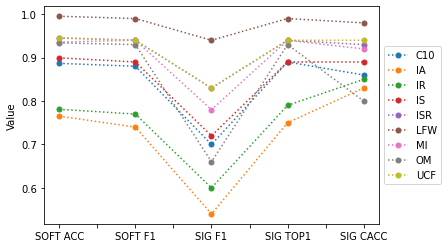

In [ ]:
generate_graph_template_6(df, save_img=save_img, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

## Figure 4.2


### Generate df

In [ ]:
softmax_metrics = []
sigmoid_metrics = ['f1_score', 'mean_class_accuracy']
ds_type = "multi"

save_path = "Figure-4-2.csv"

In [ ]:
df = generate_table_template_13(ds_type, softmax_metrics, sigmoid_metrics, src_path=path, transverse=True)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Patch_Patch_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Full_Full_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Patch_Patch_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/UTKFaces-Embeddings-23-03-21/new_metricsUTKFaces_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/YaleFaces-Embeddings-24-03-21/new_metricsYaleFaces_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes

In [ ]:
print(df)

           CAA  COCO_F  COCO_P  IM_F  IM_P   UTK    YF
SIG F1    0.62    0.75    0.44  0.39  0.48  0.60  0.66
SIG CACC  0.69    0.88    0.77  0.75  0.79  0.74  0.88


In [ ]:
df.to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "Figure-4-2.png"
plot_title = None
plot_x_label = None
plot_y_label = "Value"
legend_title= "Datasets" 

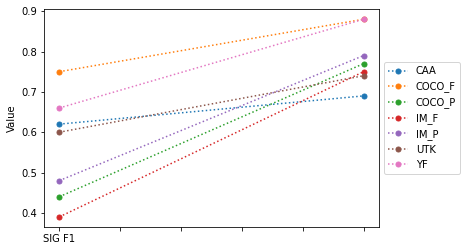

In [ ]:
generate_graph_template_6(df, save_img=save_img, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

## Figure 5.1


### Generate df

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2


In [ ]:
df_5 = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_0t10w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_0t20w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Em

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(single_datasets.keys())
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2

In [ ]:
df_6 = generate_table_template_2(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/new_metricsOmniglot_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/new_metricsLFW_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/MiniImagenet-Embeddings-28-02-21/new_metricsMiniImagenet_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/UCF101-Embeddings-28-02-21/new_metricsUCF101_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/IndoorSceneRecognition-Embeddings-28-02-21/new_metricsISR_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-2

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(single_datasets.keys())
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2

In [ ]:
df_7 = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/new_metricsOmniglot_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/new_metricsOmniglot_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/new_metricsLFW_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/new_metricsLFW_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PA

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(single_datasets.keys())
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2

In [ ]:
df_8 = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/new_metricsOmniglot_5w5s5a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/new_metricsOmniglot_5w5s10a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/new_metricsLFW_5w5s5a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/new_metricsLFW_5w5s10a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s5a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s10a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s5a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s10a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/MiniImagenet-Embeddings-28-02-21/new_met

In [ ]:
save_path = "Figure-5-1.csv"
softmax = False

In [ ]:
df_t_a_comp_single = generate_table_template_6(df_5, df_6, df_7, df_8, softmax)

In [ ]:
print(df_t_a_comp_single)

                              C10    IA    IR    IS  ...   LFW    MI    OM   UCF
WI                           0.70  0.54  0.60  0.72  ...  0.94  0.78  0.66  0.83
WI + T                       0.82  0.65  0.72  0.82  ...  0.98  0.89  0.82  0.89
WI + T + A (Non-trivial 5)   0.85  0.72  0.79  0.89  ...  1.00  0.92  0.88  0.93
WI + T + A (Trivial 5)       0.89  0.74  0.79  0.90  ...  0.99  0.93  0.93  0.93
WI + T + A (Non-trivial 10)  0.87  0.73  0.81  0.91  ...  1.00  0.93  0.92  0.94
WI + T + A (Trivial 10)      0.90  0.74  0.80  0.90  ...  1.00  0.94  0.95  0.94

[6 rows x 9 columns]


In [ ]:
df_t_a_comp_single.to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "Figure-5-1.png"
plot_title = None
plot_x_label = None
plot_y_label = "F1 Score"
softmax = False
legend_title="Datasets" 

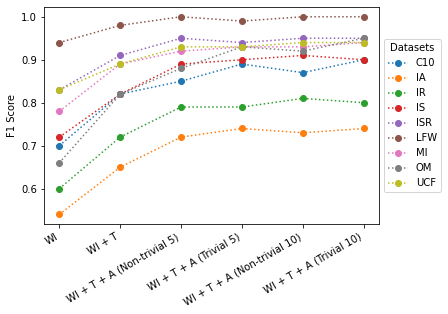

In [ ]:
generate_graph_template_2(df_t_a_comp_single, softmax, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

## Figure 5.2


### Generate df

In [ ]:
multi_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(multi_datasets.keys()))
dataset_ids = list(map(lambda x: multi_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = False # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2

In [ ]:
df_9 = generate_table_template_16(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_0t20w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t5w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t20w1s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_0t20w5s0a_

In [ ]:
multi_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(multi_datasets.keys()))
dataset_ids = list(map(lambda x: multi_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2

In [ ]:
df_10 = generate_table_template_2(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_5w5s0a_metrics_with_logits.json
Max o_f1 = 0.7388123237949622
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Patch_Patch_5w5s0a_metrics_with_logits.json
Max o_f1 = 0.5353435326617727
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Full_Full_5w5s0a_metrics_with_logits.json
Max o_f1 = 0.37573088794520604
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Patch_Patch_5w5s0a_metrics_with_logits.json
Max o_f1 = 0.5453722611908621
drive/MyDrive/PAL_HILL_2021/Experiments/UTKFaces-Embeddings-23-03-21/new_metricsUTKFaces_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/YaleFaces-Embeddings-24-03-21/new_metricsYaleFaces_5w5s

In [ ]:
single_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2

In [ ]:
df_11 = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s5a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_5w5s5a_trivial_metrics_with_logits.json
Max o_f1 = 0.7284565186592722
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_5w5s10a_trivial_metrics_with_logits.json
Max o_f1 = 0.730784089515476
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Patch_Patch_5w5s5a_trivial_metrics_with_logits.json
Max o_f1 = 0.6081864374162617
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Patch_Patch_5w5s10a_trivial_metrics_with_logits.json
Max o_f1 = 0.663890193972858
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-

In [ ]:
single_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [5, 10] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2

In [ ]:
df_12 = generate_table_template_5(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s5a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s10a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_5w5s5a_metrics_with_logits.json
Max o_f1 = 0.7550112474366698
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_5w5s10a_metrics_with_logits.json
Max o_f1 = 0.7390346440119503
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Patch_Patch_5w5s5a_metrics_with_logits.json
Max o_f1 = 0.5555115956342561
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Patch_Patch_5w5s10a_metrics_with_logits.json
Max o_f1 = 0.5978349656445486
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_metricsIMaterialist_Full_Full_5w5s5a

In [ ]:
save_path = "Figure-5-2.csv"
softmax = False

In [ ]:
df_t_a_comp_multi = generate_table_template_6(df_9, df_10, df_11, df_12, softmax)

In [ ]:
print(df_t_a_comp_multi)

                              CAA    COCO_F    COCO_P  ...      IM_P   UTK    YF
WI                           0.62  0.750000  0.440000  ...  0.480000  0.60  0.66
WI + T                       0.67  0.738812  0.535344  ...  0.545372  0.70  0.72
WI + T + A (Non-trivial 5)   0.70  0.755011  0.555512  ...  0.451540  0.78  0.77
WI + T + A (Trivial 5)       0.69  0.728457  0.608186  ...  0.541458  0.78  0.78
WI + T + A (Non-trivial 10)  0.71  0.739035  0.597835  ...  0.460888  0.76  0.77
WI + T + A (Trivial 10)      0.69  0.730784  0.663890  ...  0.562608  0.78  0.79

[6 rows x 7 columns]


In [ ]:
df_t_a_comp_multi.round(2).to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "Figure-5-2.png"
plot_title = None
plot_x_label = None
plot_y_label = "F1 Score"
legend_title="Datasets"

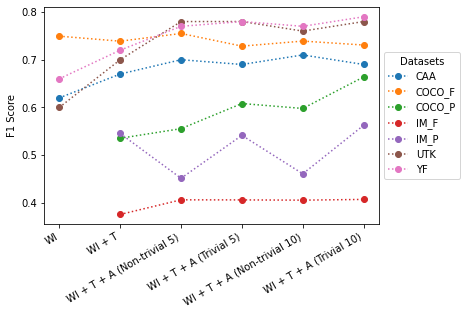

In [ ]:
generate_graph_template_2(df_t_a_comp_multi, softmax, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

## Figure 6.1


### Generate df

In [ ]:
single_datasets = get_dataset_dict(ds_type="single")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2

save_path = "Figure-6-1.csv"

In [ ]:
df_nway_comp_single = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w1s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_10w1s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_10w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w1s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_20w1s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s10a_trivial_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_20w5s10a_trivial_metrics_graphs.j

In [ ]:
print(df_nway_comp_single)

                 C10    IA    IR    IS   ISR   LFW    MI    OM   UCF
5 way 1 shot    0.72  0.54  0.58  0.72  0.80  0.96  0.80  0.80  0.83
20 way 1 shot   0.60  0.26  0.27  0.46  0.64  0.80  0.55  0.52  0.61
5 way 5 shot    0.90  0.74  0.80  0.90  0.95  1.00  0.94  0.95  0.94
20 way 5 shot   0.83  0.51  0.58  0.78  0.88  0.98  0.82  0.84  0.84


In [ ]:
df_nway_comp_single.to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "Figure-6-1.png"
plot_title = None
plot_x_label = "n-way" 
plot_y_label = "F1 Score"
legend_title="Datasets" 
softmax = False

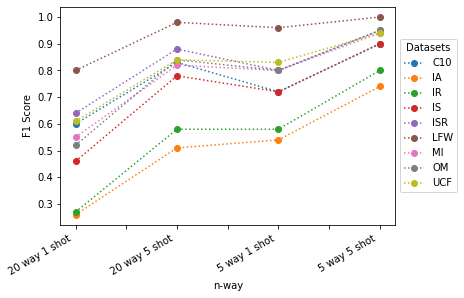

In [ ]:
generate_graph_template_3(df_nway_comp_single, softmax, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

## Figure 6.2


### Generate df

In [ ]:
multi_datasets = get_dataset_dict(ds_type="multi")
datasets = list(sorted(multi_datasets.keys()))
dataset_ids = list(map(lambda x: multi_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [10] # 0, 5, 10
trivial_aug = True # True or False
num_shot = [1, 5] # 1, 5

num_ways_all = [5, 20] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5, 13]
num_ways_cifar = [5, 10]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2

save_path = "Figure-6-2.csv"

In [ ]:
df_nway_comp_multi = generate_table_template_1(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

In [ ]:
print(df_nway_comp_multi)

                 CAA    COCO_F   COCO_P      IM_F      IM_P   UTK    YF
5 way 1 shot     0.6  0.629262     None      None  0.513471  0.59  0.65
20 way 1 shot    0.6  0.402529     None      None  0.224221  0.62   0.5
5 way 5 shot    0.69  0.730784  0.66389  0.407221  0.562608  0.78  0.79
20 way 5 shot    0.7  0.570333     None      None  0.339065  0.79   0.8


In [ ]:
print(df_nway_comp_multi)

                 CAA    COCO_F   COCO_P      IM_F      IM_P   UTK    YF
5 way 1 shot     0.6  0.629262     None      None  0.513471  0.59  0.65
20 way 1 shot    0.6  0.402529     None      None  0.224221  0.62   0.5
5 way 5 shot    0.69  0.730784  0.66389  0.407221  0.562608  0.78  0.79
20 way 5 shot    0.7  0.570333     None      None  0.339065  0.79   0.8


In [ ]:
df_nway_comp_multi = df_nway_comp_multi.copy().drop(columns=["COCO_P", "IM_F"])
# df_nway_comp_multi["COCO_F"]["5 way 5 shot "] = 0.73
# df_nway_comp_multi["IM_P"]["5 way 5 shot "] = 0.56

In [ ]:
df_nway_comp_multi.round(2)

,CAA,COCO_F,IM_P,UTK,YF
5 way 1 shot,0.6,0.629262,0.513471,0.59,0.65
20 way 1 shot,0.6,0.402529,0.224221,0.62,0.5
5 way 5 shot,0.69,0.730784,0.562608,0.78,0.79
20 way 5 shot,0.7,0.570333,0.339065,0.79,0.8


In [ ]:
df_nway_comp_multi.round(2).to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "Figure-6-2.png"
plot_title = None
plot_x_label = "n-way" 
plot_y_label = "F1 Score"
legend_title="Datasets"
softmax = False

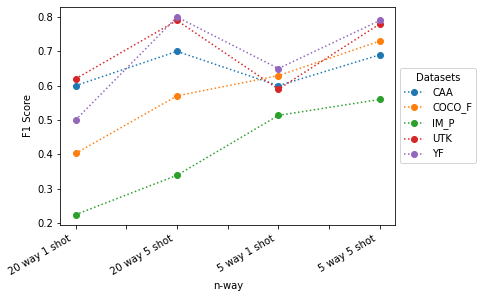

In [ ]:
generate_graph_template_3(df_nway_comp_multi, softmax, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

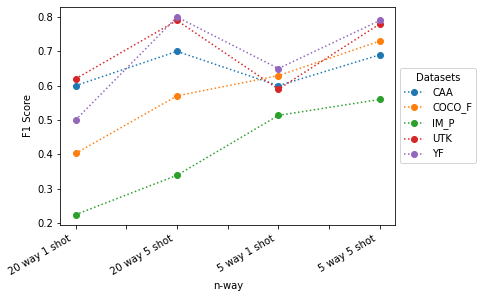

In [ ]:
generate_graph_template_3(df_nway_comp_multi, softmax, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

## Figure 7.1


###Functions

In [ ]:
def get_dataset_dict_continual(ds_type="all"):
  single_label_datasets = {
      "omniglot": ["Omniglot", "Omniglot", "OM"],
      "lfw": ["LFW", "LFW", "LFW"],
      "imagenet-a": ["ImagenetA", "ImageNet_A", "IA"],
      "imagenet-r": ["ImagenetR", "ImageNet_R", "IR"],
      "miniimagenet": ["MiniImagenet", "MiniImagenet", "MI"],
      "ucf101": ["UCF101", "UCF101", "UCF"],
      "isr": ["IndoorSceneRecognition", "Indoor_Scene_Recognition", "ISR"],
      "cifar10": ["CIFAR10", "Cifar10", "C10"],
      "imagenet-sketch": ["ImagenetSketch", "ImagenetSketch", "IS"]
  }

  multi_label_datasets = {
      "utk": ["UTKFaces", "UTKFaces", "UTK"],
      "coco": ["Coco", "Coco", "COCO_F"],
      "celeba": ["CelebAAttributes", "CelebAAttributes", "CAA"],
      "yale": ["YaleFaces", "YaleFaces", "YF"],
      "imaterialist": ["FGCVIMaterialist", "IMaterialist", "IM_P"],
  }

  all_datasets = {**single_label_datasets, **multi_label_datasets}

  if ds_type=="single":
    return single_label_datasets
  elif ds_type=="multi":
    return multi_label_datasets
  elif ds_type=="all":
    return all_datasets


def get_dataset_filename_continual(dataset):
  dic = get_dataset_dict_continual()
  return dic[dataset][1]

In [ ]:
def get_results_filename_continual(dataset_filename, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, clip_sota_eval, train):

  file_suffix = "metrics_graphs" # "metrics_with_logits"
  if dataset_filename in ['UTKFaces', 'Coco', 'CelebAAttributes', 'YaleFaces', 'IMaterialist']:
    file_prefix = "Continual_metrics_2_"
  else:
    file_prefix = "Continual_metrics_"
  
  file_type = ".json"

  filename = file_prefix + dataset_filename
  filename = filename + '_' + str(num_ways)+"w"+str(num_shot)+"s"+str(num_aug)+"a.json"
  print(dataset_filename)
  if dataset_filename == 'Omniglot':
    filename = 'Continual_metrics_rerunOmniglot_5w5s10a.json'
  return filename

In [ ]:
def get_data_from_single_file_continual(dataset, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, train, clip_sota_eval=None, src_path=None):
  results_folders = get_results_folders(src_path)
  dataset_foldername = get_dataset_foldername(dataset)
  results_folder = get_results_data_path(dataset_foldername, results_folders)
  dataset_filename = get_dataset_filename_continual(dataset)
  results_filename = get_results_filename_continual(dataset_filename, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, clip_sota_eval, train)
  filepath = os.path.join(results_folder, results_filename)
  print(filepath)
  data = read_json(filepath)
  return data

In [ ]:
def get_f1_opt_for_all_datasets(dataset_names):
  t_opt_overall = []
  for dname in dataset_names:
    data = get_data_from_single_file_continual(dname, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=path)
    if dname == 'omniglot':
      thresholds = np.arange(0.2, 0.72, 0.01)
    else:
      thresholds = np.arange(0.4, 0.72, 0.01)
    t_opt = np.max([np.mean(data["metrics"][i][1]['o_f1'], axis = 1) for i in range(len(thresholds))], axis=0)
    t_opt_overall.append(t_opt)
  return np.array(t_opt_overall)

In [ ]:
def get_opt_threshold_for_all_datasets(dataset_names):
  t_opt_overall = []
  for dname in dataset_names:
    data = get_data_from_single_file_continual(dname, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=path)
    if dname == 'omniglot':
      thresholds = np.arange(0.2, 0.72, 0.01)
    else:
      thresholds = np.arange(0.4, 0.72, 0.01)
    t_opt = thresholds[np.argmax([np.mean(data["metrics"][i][1]['o_f1'], axis = 1) for i in range(len(thresholds))], axis=0)]
    t_opt_overall.append(t_opt)
  return np.array(t_opt_overall)

In [ ]:
def f1_line_plot(dataset_names):
  colors_marker = ['blue', 'green', 'red', 'deeppink', 'orange', 'purple', 'cyan', 'brown', 'pink', 'maroon', 'lightgreen', 'gray', 'darkslateblue', 'yellow']
  colors_line = np.arange(0.3, 0.9, 0.03).astype(str)
  markers = ['o', 'v', '^', "<", '>', 's', 'P', '*', 'x']
  label_mapping = {}
  unique_threshold = np.unique(t_opt_all.ravel())
  for i in unique_threshold:
    label_mapping[i] = len(label_mapping)
  legends_added = set()
  for i in range(len(t_opt_all)):
    x = range(1, num_ways+1)
    y = f1_opt_all[i]
    t_opt = t_opt_all[i]
    plt.plot(x, y, ':', label = dataset_names[i], linewidth = 3, c = colors_marker[i])
    for j in range(len(y)):
      if t_opt[j] in legends_added:
        lab = ""
      else:
        lab = str(t_opt[j])
        legends_added.add(t_opt[j])
      plt.scatter(x[j], y[j], marker=markers[i], color = colors_line[label_mapping[t_opt[j]]], label = lab, s=200)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.yticks(np.arange(0, 1, 0.1))
  plt.show()

In [ ]:
def threshold_line_plot(dataset_names):
  colors_marker = ['blue', 'green', 'red', 'deeppink', 'orange', 'purple', 'cyan', 'brown', 'pink', 'maroon', 'lightgreen', 'gray', 'darkslateblue', 'yellow']
  colors_line = np.arange(0, 0.9, 0.1).astype(str)
  markers = ['o', 'v', '^', "<", '>', 's', 'P', '*', 'x']
  label_mapping = {}
  unique_threshold = np.unique(t_opt_all.ravel())
  for i in unique_threshold:
    label_mapping[i] = len(label_mapping)
  legends_added = set()
  for i in range(len(t_opt_all)):
    x = range(1, num_ways+1)
    y = f1_opt_all[i]
    t_opt = t_opt_all[i]
    for j in range(len(y)):
      if t_opt[j] in legends_added:
        lab = ""
      else:
        lab = str(t_opt[j])
        legends_added.add(t_opt[j])
      # plt.scatter(x[j], thresholds[t_opt[j]], marker=markers[i], color = colors_marker[label_mapping[t_opt[j]]], label = lab, s=200)
    plt.plot(x, t_opt, ':', label = dataset_names[i], linewidth = 3, marker = markers[i], c = colors_marker[i], markersize = 10)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.yticks(np.arange(0, 1, 0.1))
  plt.show()

In [ ]:
def f1_line_plot_no_marker(dataset_names):
  # colors_marker = ['blue', 'green', 'red', 'deeppink', 'orange', 'purple', 'cyan', 'brown', 'pink', 'maroon', 'lightgreen', 'gray', 'darkslateblue', 'yellow']
  # colors_line = np.arange(0.3, 0.9, 0.03).astype(str)
  #markers = ['o', 'v', '^', "<", '>', 's', 'P', '*', 'x']
  label_mapping = {}
  unique_threshold = np.unique(t_opt_all.ravel())
  for i in unique_threshold:
    label_mapping[i] = len(label_mapping)
  legends_added = set()
  for i in range(len(t_opt_all)):
    x = range(1, num_ways+1)
    y = f1_opt_all[i]
    t_opt = t_opt_all[i]
    plt.plot(x, y, ':', label = dataset_names[i], linewidth = 2, marker = 'o', markersize = 7)
    for j in range(len(y)):
      if t_opt[j] in legends_added:
        lab = ""
      else:
        lab = str(t_opt[j])
        legends_added.add(t_opt[j])
      #plt.scatter(x[j], y[j], marker=markers[i], color = colors_line[label_mapping[t_opt[j]]], label = lab, s=200)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.yticks(np.arange(0, 1, 0.1))
  plt.show()

### Generate df

In [ ]:
path = "drive/MyDrive/PAL_HILL_2021/Experiments/"

In [ ]:
thresholds = np.arange(0.4, 0.72, 0.01)

In [ ]:
single_datasets = get_dataset_dict_continual(ds_type="single") # ['utk', 'omniglot', 'lfw', 'imagenet-a', 'imagenet-r', 'miniimagenet', 'ucf101', 'isr', 'coco', 'celeba', 'yale', 'imaterialist', 'imagenet-sketch', 'cifar10']
datasets = sorted(list(datasets))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
print(dataset_ids)
# datasets.remove('isr')
#datasets.remove('imagenet-a')
#datasets.remove('imagenet-r')
print(datasets)
train = False # True or False
num_aug = 10 # 0, 5, 10
num_shot = 5 # 1, 5
num_ways = 5 # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
trivial_aug = False
softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each
clip_sota_eval = "zero-shot" # zero-shot, "linear-probe", None

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metrics = ["o_f1"] 

['C10', 'IA', 'IR', 'IS', 'ISR', 'LFW', 'MI', 'OM', 'UCF']
['cifar10', 'imagenet-a', 'imagenet-r', 'imagenet-sketch', 'isr', 'lfw', 'miniimagenet', 'omniglot', 'ucf101']


In [ ]:
t_opt_all = get_opt_threshold_for_all_datasets(datasets)
f1_opt_all = get_f1_opt_for_all_datasets(datasets)

Cifar10
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/Continual_metrics_Cifar10_5w5s10a.json
ImageNet_A
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/Continual_metrics_ImageNet_A_5w5s10a.json
ImageNet_R
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/Continual_metrics_ImageNet_R_5w5s10a.json
ImagenetSketch
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/Continual_metrics_ImagenetSketch_5w5s10a.json
Indoor_Scene_Recognition
drive/MyDrive/PAL_HILL_2021/Experiments/IndoorSceneRecognition-Embeddings-28-02-21/Continual_metrics_Indoor_Scene_Recognition_5w5s10a.json
LFW
drive/MyDrive/PAL_HILL_2021/Experiments/LFW-Embeddings-28-02-21/Continual_metrics_LFW_5w5s10a.json
MiniImagenet
drive/MyDrive/PAL_HILL_2021/Experiments/MiniImagenet-Embeddings-28-02-21/Continual_metrics_MiniImagenet_5w5s10a.json
Omniglot
drive/MyDrive/PAL_HILL_2021/Experiments/Omniglot-Embeddings-28-02-21/Continual_metrics_rerunOmnig

In [ ]:
f1_opt_all_tr = np.transpose(f1_opt_all)

In [ ]:
df_continual_single_label = pd.DataFrame(data = f1_opt_all_tr, columns = dataset_ids)

In [ ]:
df_continual_single_label.head()

,C10,IA,IR,IS,ISR,LFW,MI,OM,UCF
0,0.826667,0.826667,0.848000,0.917333,0.949333,0.961333,0.860000,0.838667,0.952000
1,0.750356,0.580688,0.653473,0.759812,0.854512,0.879520,0.736241,0.692925,0.866039
2,0.732916,0.662278,0.699617,0.796349,0.880941,0.911712,0.816836,0.806660,0.886904
3,0.785501,0.649977,0.732793,0.852888,0.924747,0.945246,0.875099,0.850815,0.910998
4,0.838309,0.696205,0.800010,0.901292,0.962393,0.994074,0.912828,0.862491,0.943701


In [ ]:
save_path = "Figure-7-1.csv"
df_continual_single_label.round(2).to_csv(save_path)

### Plot chart

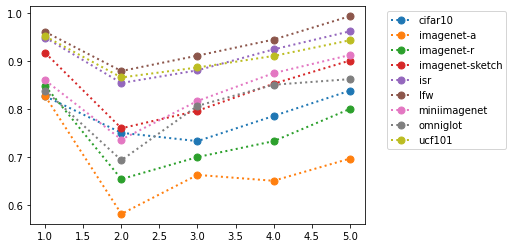

In [ ]:
f1_line_plot_no_marker(datasets)

## Figure 7.2


###Functions

In [ ]:
def get_dataset_dict_continual(ds_type="all"):
  single_label_datasets = {
      "omniglot": ["Omniglot", "Omniglot", "OM"],
      "lfw": ["LFW", "LFW", "LFW"],
      "imagenet-a": ["ImagenetA", "ImageNet_A", "IA"],
      "imagenet-r": ["ImagenetR", "ImageNet_R", "IR"],
      "miniimagenet": ["MiniImagenet", "MiniImagenet", "MI"],
      "ucf101": ["UCF101", "UCF101", "UCF"],
      "isr": ["IndoorSceneRecognition", "Indoor_Scene_Recognition", "ISR"],
      "cifar10": ["CIFAR10", "Cifar10", "C10"],
      "imagenet-sketch": ["ImagenetSketch", "ImagenetSketch", "IS"]
  }

  multi_label_datasets = {
      "utk": ["UTKFaces", "UTKFaces", "UTK"],
      "coco": ["Coco", "Coco", "COCO"],
      "celeba": ["CelebAAttributes", "CelebAAttributes", "CAA"],
      "yale": ["YaleFaces", "YaleFaces", "YF"],
      "imaterialist": ["FGCVIMaterialist", "IMaterialist", "IM"],
  }

  all_datasets = {**single_label_datasets, **multi_label_datasets}

  if ds_type=="single":
    return single_label_datasets
  elif ds_type=="multi":
    return multi_label_datasets
  elif ds_type=="all":
    return all_datasets

def get_dataset_foldername_continual(dataset):
  dic = get_dataset_dict_continual()
  return dic[dataset][0]

def get_dataset_filename_continual(dataset):
  dic = get_dataset_dict_continual()
  return dic[dataset][1]

In [ ]:
def get_results_filename_continual(dataset_filename, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, clip_sota_eval, train):

  file_suffix = "metrics_graphs" # "metrics_with_logits"
  if dataset_filename in ['UTKFaces', 'Coco', 'CelebAAttributes', 'YaleFaces', 'IMaterialist']:
    file_prefix = "Continual_metrics_2_"
  else:
    file_prefix = "Continual_metrics_"
  
  file_type = ".json"

  filename = file_prefix + dataset_filename
  filename = filename + '_' + str(num_ways)+"w"+str(num_shot)+"s"+str(num_aug)+"a.json"
  print(dataset_filename)
  if dataset_filename == 'Omniglot':
    filename = 'Continual_metrics_rerunOmniglot_5w5s10a.json'
  return filename

In [ ]:
def get_data_from_single_file_continual(dataset, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, train, clip_sota_eval=None, src_path=None):
  results_folders = get_results_folders(src_path)
  dataset_foldername = get_dataset_foldername_continual(dataset)
  results_folder = get_results_data_path(dataset_foldername, results_folders)
  dataset_filename = get_dataset_filename_continual(dataset)
  results_filename = get_results_filename_continual(dataset_filename, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, clip_sota_eval, train)
  filepath = os.path.join(results_folder, results_filename)
  print(filepath)
  data = read_json(filepath)
  return data

In [ ]:
def get_f1_opt_for_all_datasets(dataset_names):
  t_opt_overall = []
  for dname in dataset_names:
    data = get_data_from_single_file_continual(dname, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=path)
    if dname == 'omniglot':
      thresholds = np.arange(0.2, 0.72, 0.01)
    else:
      thresholds = np.arange(0.44, 0.72, 0.01)
    t_opt = np.max([np.mean(data["metrics"][i][1]['o_f1'], axis = 1) for i in range(len(thresholds))], axis=0)
    t_opt_overall.append(t_opt)
  return np.array(t_opt_overall)

In [ ]:
def get_opt_threshold_for_all_datasets(dataset_names):
  t_opt_overall = []
  for dname in dataset_names:
    data = get_data_from_single_file_continual(dname, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=path)
    if dname == 'omniglot':
      thresholds = np.arange(0.2, 0.72, 0.01)
    else:
      thresholds = np.arange(0.44, 0.72, 0.01)
    t_opt = thresholds[np.argmax([np.mean(data["metrics"][i][1]['o_f1'], axis = 1) for i in range(len(thresholds))], axis=0)]
    t_opt_overall.append(t_opt)
  return np.array(t_opt_overall)

In [ ]:
def f1_line_plot(dataset_names):
  colors_marker = ['blue', 'green', 'red', 'deeppink', 'orange', 'purple', 'cyan', 'brown', 'pink', 'maroon', 'lightgreen', 'gray', 'darkslateblue', 'yellow']
  colors_line = np.arange(0.3, 0.9, 0.03).astype(str)
  markers = ['o', 'v', '^', "<", '>', 's', 'P', '*', 'x']
  label_mapping = {}
  unique_threshold = np.unique(t_opt_all.ravel())
  for i in unique_threshold:
    label_mapping[i] = len(label_mapping)
  legends_added = set()
  for i in range(len(t_opt_all)):
    x = range(1, num_ways+1)
    y = f1_opt_all[i]
    t_opt = t_opt_all[i]
    plt.plot(x, y, ':', label = dataset_names[i], linewidth = 3, c = colors_marker[i])
    for j in range(len(y)):
      if t_opt[j] in legends_added:
        lab = ""
      else:
        lab = str(t_opt[j])
        legends_added.add(t_opt[j])
      plt.scatter(x[j], y[j], marker=markers[i], color = colors_line[label_mapping[t_opt[j]]], label = lab, s=200)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.yticks(np.arange(0, 1, 0.1))
  plt.show()

In [ ]:
def threshold_line_plot(dataset_names):
  colors_marker = ['blue', 'green', 'red', 'deeppink', 'orange', 'purple', 'cyan', 'brown', 'pink', 'maroon', 'lightgreen', 'gray', 'darkslateblue', 'yellow']
  colors_line = np.arange(0, 0.9, 0.1).astype(str)
  markers = ['o', 'v', '^', "<", '>', 's', 'P', '*', 'x']
  label_mapping = {}
  unique_threshold = np.unique(t_opt_all.ravel())
  for i in unique_threshold:
    label_mapping[i] = len(label_mapping)
  legends_added = set()
  for i in range(len(t_opt_all)):
    x = range(1, num_ways+1)
    y = f1_opt_all[i]
    t_opt = t_opt_all[i]
    for j in range(len(y)):
      if t_opt[j] in legends_added:
        lab = ""
      else:
        lab = str(t_opt[j])
        legends_added.add(t_opt[j])
      # plt.scatter(x[j], thresholds[t_opt[j]], marker=markers[i], color = colors_marker[label_mapping[t_opt[j]]], label = lab, s=200)
    plt.plot(x, t_opt, ':', label = dataset_names[i], linewidth = 3, marker = markers[i], c = colors_marker[i], markersize = 10)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.yticks(np.arange(0, 1, 0.1))
  plt.show()

In [ ]:
def f1_line_plot_no_marker(dataset_names):
  # colors_marker = ['blue', 'green', 'red', 'deeppink', 'orange', 'purple', 'cyan', 'brown', 'pink', 'maroon', 'lightgreen', 'gray', 'darkslateblue', 'yellow']
  # colors_line = np.arange(0.3, 0.9, 0.03).astype(str)
  #markers = ['o', 'v', '^', "<", '>', 's', 'P', '*', 'x']
  label_mapping = {}
  unique_threshold = np.unique(t_opt_all.ravel())
  for i in unique_threshold:
    label_mapping[i] = len(label_mapping)
  legends_added = set()
  for i in range(len(t_opt_all)):
    x = range(1, num_ways+1)
    y = f1_opt_all[i]
    t_opt = t_opt_all[i]
    plt.plot(x, y, ':', label = dataset_names[i], linewidth = 2, marker = 'o', markersize = 7)
    for j in range(len(y)):
      if t_opt[j] in legends_added:
        lab = ""
      else:
        lab = str(t_opt[j])
        legends_added.add(t_opt[j])
      #plt.scatter(x[j], y[j], marker=markers[i], color = colors_line[label_mapping[t_opt[j]]], label = lab, s=200)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.yticks(np.arange(0, 1, 0.1))
  plt.show()

### Generate df

In [ ]:
multi_datasets = get_dataset_dict_continual(ds_type="multi") # ['utk', 'omniglot', 'lfw', 'imagenet-a', 'imagenet-r', 'miniimagenet', 'ucf101', 'isr', 'coco', 'celeba', 'yale', 'imaterialist', 'imagenet-sketch', 'cifar10']
datasets = sorted(list(multi_datasets))
dataset_ids = list(map(lambda x: multi_datasets[x][2], datasets)) # 2nd index has ID of dataset
# datasets.remove('isr')
#datasets.remove('imagenet-a')
#datasets.remove('imagenet-r')
print(datasets)
train = False # True or False
num_aug = 10 # 0, 5, 10
num_shot = 5 # 1, 5
num_ways = 5 # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
trivial_aug = False
softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each
clip_sota_eval = "zero-shot" # zero-shot, "linear-probe", None

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metrics = ["o_f1"] 

['celeba', 'coco', 'imaterialist', 'utk', 'yale']


In [ ]:
t_opt_all = get_opt_threshold_for_all_datasets(datasets)
f1_opt_all = get_f1_opt_for_all_datasets(datasets)

CelebAAttributes
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/Continual_metrics_2_CelebAAttributes_5w5s10a.json
Coco
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/Continual_metrics_2_Coco_5w5s10a.json
IMaterialist
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/Continual_metrics_2_IMaterialist_5w5s10a.json
UTKFaces
drive/MyDrive/PAL_HILL_2021/Experiments/UTKFaces-Embeddings-23-03-21/Continual_metrics_2_UTKFaces_5w5s10a.json
YaleFaces
drive/MyDrive/PAL_HILL_2021/Experiments/YaleFaces-Embeddings-24-03-21/Continual_metrics_2_YaleFaces_5w5s10a.json
CelebAAttributes
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/Continual_metrics_2_CelebAAttributes_5w5s10a.json
Coco
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/Continual_metrics_2_Coco_5w5s10a.json
IMaterialist
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/Continual_metrics_2_IMateri

In [ ]:
f1_opt_all_tr = np.transpose(f1_opt_all)
df_continual_multi_label = pd.DataFrame(data = f1_opt_all_tr, columns = dataset_ids)
save_path = "Figure-7-2.csv"
df_continual_multi_label.round(2).to_csv(save_path)

In [ ]:
df_continual_multi_label.round(2).head()

,CAA,COCO,IM,UTK,YF
0,0.68,0.89,0.82,0.74,0.86
1,0.66,0.68,0.49,0.67,0.72
2,0.72,0.76,0.54,0.73,0.72
3,0.72,0.81,0.58,0.76,0.75
4,0.73,0.80,0.53,0.80,0.76


### Plot chart

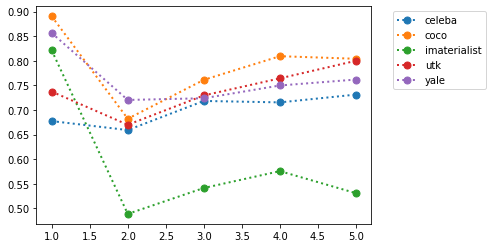

In [ ]:
f1_line_plot_no_marker(datasets)

## Figure 8.1


### Generate df

In [ ]:
all_datasets = get_dataset_dict(ds_type="all")
datasets = list(sorted(all_datasets.keys()))
dataset_ids = list(map(lambda x: all_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2

save_path_thresholds_epochs = "Figure-8-1.csv"

In [ ]:
df = generate_table_template_4(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=num_digits)

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_5w5s0a_metrics_graphs.json
Unable to find data for: coco_full, 5, 5, sigmoid, train
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Patch_Patch_5w5s0a_metrics_graphs.json
Unable to find data for: coco_patch, 5, 5, sigmoid, train
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Exper

In [ ]:
print(df)

     CAA   C10  COCO_F  COCO_P    IA    IR  ...   LFW    MI    OM   UCF   UTK    YF
0   0.67  0.70    0.70    0.70  0.66  0.67  ...  0.69  0.69  0.72  0.69  0.68  0.71
5   0.65  0.68    0.68    0.68  0.65  0.65  ...  0.67  0.67  0.70  0.66  0.67  0.68
10  0.62  0.63    0.63    0.63  0.62  0.62  ...  0.62  0.62  0.63  0.62  0.63  0.63
15  0.59  0.58    0.58    0.58  0.59  0.59  ...  0.58  0.58  0.57  0.58  0.59  0.57
20  0.56  0.54    0.54    0.54  0.57  0.57  ...  0.55  0.55  0.53  0.55  0.55  0.54
25  0.53  0.51    0.51    0.51  0.55  0.55  ...  0.53  0.53  0.50  0.53  0.53  0.51
30  0.52  0.50    0.50    0.50  0.54  0.54  ...  0.51  0.51  0.49  0.51  0.51  0.50
35  0.51  0.49    0.49    0.49  0.53  0.53  ...  0.50  0.50  0.48  0.50  0.50  0.48
40  0.50  0.48    0.48    0.48  0.52  0.52  ...  0.49  0.49  0.47  0.49  0.49  0.48
45  0.49  0.47    0.47    0.47  0.51  0.51  ...  0.49  0.49  0.46  0.49  0.49  0.47
50  0.49  0.47    0.47    0.47  0.51  0.51  ...  0.49  0.48  0.46  0.48  0.4

In [ ]:
df.round(2).to_csv(save_path_thresholds_epochs)

### Plot chart

In [ ]:
single_datasets = get_dataset_dict(ds_type="threshold_plot")
datasets = list(sorted(single_datasets.keys()))
dataset_ids = list(map(lambda x: single_datasets[x][2], datasets)) # 2nd index has ID of dataset
train = True # True or False
num_aug = [0] # 0, 5, 10
trivial_aug = False # True or False
num_shot = [5] # 1, 5

num_ways_all = [5] # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
num_ways_isr_utk = [5]
num_ways_cifar = [5]

softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metric = "o_f1"
num_digits = 2

save_img = True
save_path = "Figure-8-1.png"
plot_title = None
plot_x_label = "Num Training Epochs"
plot_y_label = "Threshold value"
legend_title = "Datasets"

drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/new_metricsCelebAAttributes_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/new_metricsCIFAR10_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/new_metricsCoco_Full_Full_5w5s0a_metrics_graphs.json
Unable to find data for: coco_full, 5, 5, sigmoid, train
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/new_metricsImagenetA_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/new_metricsImagenetR_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/new_metricsImagenetSketch_5w5s0a_metrics_graphs.json
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/new_me

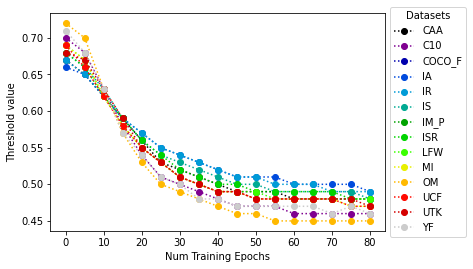

In [ ]:
generate_graph_template_1b(datasets, dataset_ids, num_ways_all, num_ways_cifar, num_ways_isr_utk, num_shot, metric, num_aug, trivial_aug, softmax, continual, train, src_path=path, num_digits=2, save_img=save_img, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

## Figure 8.2


In [ ]:
thresholds = np.arange(0.4, 0.72, 0.01)
thresholds_multi = np.arange(0.44, 0.72, 0.01)

###Functions

In [ ]:
def get_opt_threshold_for_all_datasets(dataset_names):
  t_opt_overall = []
  for dname in dataset_names:
    data = get_data_from_single_file_continual(dname, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=path)
    if dname == 'omniglot':
      thresholds = np.arange(0.2, 0.72, 0.01)
    elif dname in ['utk', 'coco', 'celeba', 'yale', 'imaterialist']:
      thresholds = np.arange(0.44, 0.72, 0.01)
    else:
      thresholds = np.arange(0.4, 0.72, 0.01)
    t_opt = thresholds[np.argmax([np.mean(data["metrics"][i][1]['o_f1'], axis = 1) for i in range(len(thresholds))], axis=0)]
    t_opt_overall.append(t_opt)
  return np.array(t_opt_overall)

In [ ]:
def get_f1_opt_for_all_datasets(dataset_names):
  t_opt_overall = []
  for dname in dataset_names:
    data = get_data_from_single_file_continual(dname, num_ways, num_shot, num_aug, trivial_aug, softmax, continual, train, clip_sota_eval=clip_sota_eval, src_path=path)
    if dname == 'omniglot':
      thresholds = np.arange(0.2, 0.72, 0.01)
    elif dname in ['utk', 'coco', 'celeba', 'yale', 'imaterialist']:
      thresholds = np.arange(0.44, 0.72, 0.01)
    else:
      thresholds = np.arange(0.4, 0.72, 0.01)
    t_opt = np.max([np.mean(data["metrics"][i][1]['o_f1'], axis = 1) for i in range(len(thresholds))], axis=0)
    t_opt_overall.append(t_opt)
  return np.array(t_opt_overall)

In [ ]:
def f1_line_plot(dataset_names):
  colors_marker = ['blue', 'green', 'red', 'deeppink', 'orange', 'purple', 'cyan', 'brown', 'pink', 'maroon', 'lightgreen', 'gray', 'darkslateblue', 'yellow']
  colors_line = np.arange(0.3, 0.9, 0.03).astype(str)
  markers = ['o', 'v', '^', "<", '>', 's', 'P', '*', 'x']
  label_mapping = {}
  unique_threshold = np.unique(t_opt_all.ravel())
  for i in unique_threshold:
    label_mapping[i] = len(label_mapping)
  legends_added = set()
  for i in range(len(t_opt_all)):
    x = range(1, num_ways+1)
    y = f1_opt_all[i]
    t_opt = t_opt_all[i]
    plt.plot(x, y, ':', label = dataset_names[i], linewidth = 3, c = colors_marker[i])
    for j in range(len(y)):
      if t_opt[j] in legends_added:
        lab = ""
      else:
        lab = str(t_opt[j])
        legends_added.add(t_opt[j])
      plt.scatter(x[j], y[j], marker=markers[i], color = colors_line[label_mapping[t_opt[j]]], label = lab, s=200)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.yticks(np.arange(0, 1, 0.1))
  plt.show()

In [ ]:
def threshold_line_plot(dataset_names):
  colors_marker = ['blue', 'green', 'red', 'deeppink', 'orange', 'purple', 'cyan', 'brown', 'pink', 'maroon', 'lightgreen', 'gray', 'darkslateblue', 'yellow']
  colors_line = np.arange(0, 0.9, 0.1).astype(str)
  #markers = ['o', 'v', '^', "<", '>', 's', 'P', '*', 'x']
  label_mapping = {}
  unique_threshold = np.unique(t_opt_all.ravel())
  for i in unique_threshold:
    label_mapping[i] = len(label_mapping)
  legends_added = set()
  for i in range(len(t_opt_all)):
    x = range(1, num_ways+1)
    y = f1_opt_all[i]
    t_opt = t_opt_all[i]
    for j in range(len(y)):
      if t_opt[j] in legends_added:
        lab = ""
      else:
        lab = str(t_opt[j])
        legends_added.add(t_opt[j])
      # plt.scatter(x[j], thresholds[t_opt[j]], marker=markers[i], color = colors_marker[label_mapping[t_opt[j]]], label = lab, s=200)
    plt.plot(x, t_opt, ':', label = dataset_names[i], marker = 'o', markersize = 7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.yticks(np.arange(0, 1, 0.1))
  plt.show()

In [ ]:
def f1_line_plot_no_marker(dataset_names):
  # colors_marker = ['blue', 'green', 'red', 'deeppink', 'orange', 'purple', 'cyan', 'brown', 'pink', 'maroon', 'lightgreen', 'gray', 'darkslateblue', 'yellow']
  # colors_line = np.arange(0.3, 0.9, 0.03).astype(str)
  #markers = ['o', 'v', '^', "<", '>', 's', 'P', '*', 'x']
  label_mapping = {}
  unique_threshold = np.unique(t_opt_all.ravel())
  for i in unique_threshold:
    label_mapping[i] = len(label_mapping)
  legends_added = set()
  for i in range(len(t_opt_all)):
    x = range(1, num_ways+1)
    y = f1_opt_all[i]
    t_opt = t_opt_all[i]
    plt.plot(x, y, ':', label = dataset_names[i], marker = 'o', markersize = 10)
    for j in range(len(y)):
      if t_opt[j] in legends_added:
        lab = ""
      else:
        lab = str(t_opt[j])
        legends_added.add(t_opt[j])
      #plt.scatter(x[j], y[j], marker=markers[i], color = colors_line[label_mapping[t_opt[j]]], label = lab, s=200)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.yticks(np.arange(0, 1, 0.1))
  plt.show()

### Generate df

In [ ]:
all_datasets = get_dataset_dict_continual(ds_type="all") # ['utk', 'omniglot', 'lfw', 'imagenet-a', 'imagenet-r', 'miniimagenet', 'ucf101', 'isr', 'coco', 'celeba', 'yale', 'imaterialist', 'imagenet-sketch', 'cifar10']
datasets = sorted(list(all_datasets))
dataset_ids = list(map(lambda x: all_datasets[x][2], datasets)) # 2nd index has ID of dataset
# datasets.remove('isr')
#datasets.remove('imagenet-a')
#datasets.remove('imagenet-r')
print(datasets)
train = False # True or False
num_aug = 10 # 0, 5, 10
num_shot = 5 # 1, 5
num_ways = 5 # all: 5, 20 - CIFAR: 5, 10 & ISR : 5, 13
trivial_aug = False
softmax = False # Get sigmoid or softmax results
continual = False # Continual or non continual setting, data format is different for each
clip_sota_eval = "zero-shot" # zero-shot, "linear-probe", None

# Single label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
# Multi label datasets - ['hamming', 'jaccard', 'subset_accuracy', 'map', 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'c_accuracy']
# Single label datasets -softmax - [ 'c_f1', 'o_f1', 'c_precision', 'o_precision', 'c_recall', 'o_recall', 'top1_accuracy', 'top5_accuracy', 'c_accuracy']
metrics = ["o_f1"] 

['celeba', 'cifar10', 'coco', 'imagenet-a', 'imagenet-r', 'imagenet-sketch', 'imaterialist', 'isr', 'lfw', 'miniimagenet', 'omniglot', 'ucf101', 'utk', 'yale']


In [ ]:
t_opt_all = get_opt_threshold_for_all_datasets(datasets)
f1_opt_all = get_f1_opt_for_all_datasets(datasets)

CelebAAttributes
drive/MyDrive/PAL_HILL_2021/Experiments/CelebAAttributes-Embeddings-22-03-21/Continual_metrics_2_CelebAAttributes_5w5s10a.json
Cifar10
drive/MyDrive/PAL_HILL_2021/Experiments/CIFAR10-Embeddings-28-02-21/Continual_metrics_Cifar10_5w5s10a.json
Coco
drive/MyDrive/PAL_HILL_2021/Experiments/Coco-Embeddings-28-02-21/Continual_metrics_2_Coco_5w5s10a.json
ImageNet_A
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetA-Embeddings-28-02-21/Continual_metrics_ImageNet_A_5w5s10a.json
ImageNet_R
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetR-Embeddings-28-02-21/Continual_metrics_ImageNet_R_5w5s10a.json
ImagenetSketch
drive/MyDrive/PAL_HILL_2021/Experiments/ImagenetSketch-Embeddings-28-02-21/Continual_metrics_ImagenetSketch_5w5s10a.json
IMaterialist
drive/MyDrive/PAL_HILL_2021/Experiments/FGCVIMaterialist-Embeddings-24-03-21/Continual_metrics_2_IMaterialist_5w5s10a.json
Indoor_Scene_Recognition
drive/MyDrive/PAL_HILL_2021/Experiments/IndoorSceneRecognition-Embeddings-28-02-21/Continu

In [ ]:
t_opt_all_tr = np.transpose(t_opt_all)
df_continual_opt_thresholds = pd.DataFrame(data = t_opt_all_tr, columns = dataset_ids)
save_path = "Figure-8-2.csv"
df_continual_opt_thresholds.round(2).to_csv(save_path)

In [ ]:
df_continual_opt_thresholds.round(2).head()

,CAA,C10,COCO,IA,IR,IS,IM,ISR,LFW,MI,OM,UCF,UTK,YF
0,0.60,0.67,0.60,0.64,0.66,0.66,0.62,0.67,0.65,0.66,0.64,0.66,0.61,0.64
1,0.51,0.56,0.52,0.56,0.56,0.57,0.51,0.57,0.59,0.57,0.52,0.58,0.52,0.53
2,0.50,0.54,0.51,0.55,0.54,0.55,0.50,0.55,0.57,0.55,0.50,0.55,0.50,0.52
3,0.49,0.53,0.50,0.54,0.53,0.54,0.49,0.54,0.56,0.54,0.49,0.54,0.50,0.51
4,0.49,0.53,0.49,0.54,0.53,0.53,0.48,0.53,0.54,0.53,0.49,0.53,0.49,0.50


###Plot chart

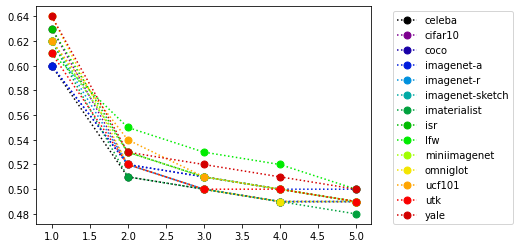

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
number_of_plots=15
colormap = plt.cm.nipy_spectral
colors = [colormap(i) for i in np.linspace(0, 1,number_of_plots)]
ax1.set_prop_cycle('color', colors)
threshold_line_plot(datasets)

## Appendix Figure 1.1 (Colorectal Histology - Softmax)

### Generate df

In [ ]:
aug_array = [0,5,10]
triv_array = [False,True]

num_ways = 8
num_shot = 5
num_eval = 15
softmax = True
save_path = "A-Figure-1-1.csv"
dataset = "colorectal_histology"

In [ ]:
df = generate_table_template_15(dataset, aug_array, triv_array, num_ways, num_shot, num_eval, softmax, src_path=path)

In [ ]:
print(df)

   accuracy      o_f1  state_of_the_art            label
0  0.907167  0.628667            0.9283           8w5s0a
1  0.856771  0.427083            0.9283           8w5s5a
2  0.920562  0.682250            0.9283   8w5s5a_trivial
3  0.916063  0.664250            0.9283          8w5s10a
4  0.922479  0.689917            0.9283  8w5s10a_trivial


In [ ]:
df.round(2).to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "A-Figure-1-1.png"
plot_title = None
plot_x_label = "n-way" 
plot_y_label = "values"
legend_title=None

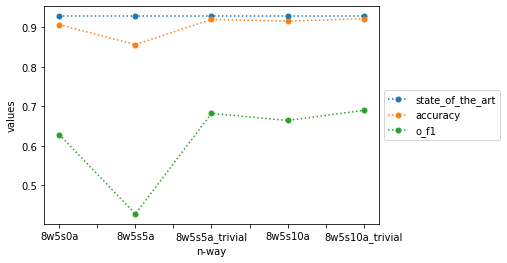

In [ ]:
generate_graph_template_7(df, save_img=save_img, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

## Appendix Figure 1.2 (Colorectal Histology - Sigmoid)

### Generate df

In [ ]:
aug_array = [0,5,10]
triv_array = [False,True]

num_ways = 8
num_shot = 5
num_eval = 15
softmax = False
save_path = "A-Figure-1-2.csv"
dataset = "colorectal_histology"

In [ ]:
df = generate_table_template_15(dataset, aug_array, triv_array, num_ways, num_shot, num_eval, softmax, src_path=path)

In [ ]:
print(df)

   accuracy      o_f1  state_of_the_art            label
0  0.888292  0.432841            0.9283           8w5s0a
1  0.913000  0.600281            0.9283           8w5s5a
2  0.921167  0.641890            0.9283   8w5s5a_trivial
3  0.914667  0.639504            0.9283          8w5s10a
4  0.921625  0.668749            0.9283  8w5s10a_trivial


In [ ]:
df.round(2).to_csv(save_path)

### Plot chart

In [ ]:
save_img = True
save_path = "A-Figure-1-2.png"
plot_title = None
plot_x_label = "n-way" 
plot_y_label = "values"
legend_title=None

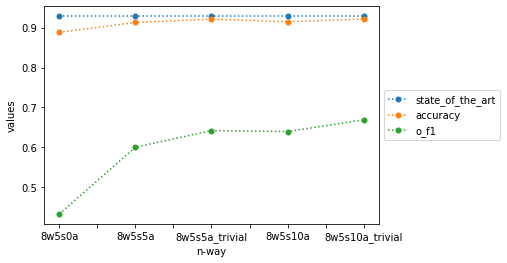

In [ ]:
generate_graph_template_7(df, save_img=save_img, save_path=save_path, plot_title=plot_title, plot_x_label=plot_x_label, plot_y_label=plot_y_label, legend_title=legend_title)

#Downloading all CSVs

In [ ]:
from google.colab import files

In [ ]:
file_list = os.listdir('.')

In [ ]:
file_list[1][-3:]

'png'

In [ ]:
file_list

['.config',
 'Figure-3-2.png',
 'Figure-3-1.csv',
 'Figure-4-2.csv',
 'Figure-4-2.png',
 'Figure-7-2.csv',
 'Figure-6-2.png',
 'Figure-4-1.csv',
 'Figure-6-1.csv',
 'Figure-3-1.png',
 'Figure-5-1.csv',
 'A-Figure-1-1.png',
 'A-Figure-1-2.png',
 'Figure-6-1.png',
 'Figure-2-1.csv',
 'Figure-6-2.csv',
 'Figure-4-1.png',
 'Table-2.csv',
 'Figure-2-1.png',
 'drive',
 'A-Figure-1-1.csv',
 'Figure-2-2.csv',
 'Figure-8-1.csv',
 'Figure-8-2.csv',
 'Figure-2-2.png',
 'Figure-7-1.csv',
 'Figure-5-2.png',
 'Figure-8-1.png',
 'A-Figure-1-2.csv',
 'Figure-3-2.csv',
 'Figure-5-1.png',
 'sample_data']

In [ ]:
for f in file_list:
  if f[-3:] == 'csv':
    files.download(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>